In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
from docx import Document
import pandas as pd
import re
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from scipy import stats
from datetime import datetime
import random
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [33]:
doc = Document('speech.docx')
content = '\n'.join([para.text for para in doc.paragraphs])

speeches = []
lines = content.strip().split('\n')

i = 0
speech_count = 0
while i < len(lines):
    line = lines[i].strip()
    
    if line == '#':
        speech_count += 1
        
        if i + 4 < len(lines):
            line4 = lines[i+4]
            speaker_part = ""
            keywords_part = ""
            
            if ':' in line4:
                parts = line4.split(':', 1)
                speaker_part = parts[0].strip()
                if len(parts) > 1:
                    keywords_part = parts[1].strip()
            else:
                speaker_part = line4.strip()
            
            speech = {
                'id': speech_count,
                'title': lines[i+1].strip(),
                'date': lines[i+2].strip(),
                'url': lines[i+3].strip(),
                'speaker': speaker_part,
                'keywords': keywords_part,  # KEYWORDS ADDED
                'text': ''
            }
            
            text_lines = []
            j = i + 5
            while j < len(lines) and not (lines[j].strip().startswith('#')):
                clean_line = lines[j].strip()
                text_lines.append(clean_line)
                j += 1
            
            speech['text'] = ' '.join(text_lines)
            speeches.append(speech)
            i = j
        else:
            i += 1
    else:
        i += 1

df = pd.DataFrame(speeches)

if len(df) > 0:
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['text'].apply(lambda x: len(str(x)))
    
    df.to_csv('speech.csv', index=False, encoding='utf-8')
    
    try:
        with pd.ExcelWriter('speech.xlsx', engine='openpyxl') as writer:
            df.to_excel(writer, sheet_name='Speeches', index=False)
            
            workbook = writer.book
            worksheet = writer.sheets['Speeches']
            
            for column in worksheet.columns:
                max_length = 0
                column_letter = column[0].column_letter
                for cell in column:
                    try:
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = min(max_length + 2, 50)
                worksheet.column_dimensions[column_letter].width = adjusted_width
            
    except Exception as e:
        print("Excel save error: {e}")
else:
    print("No speeches found!")

print("Process completed!")

Process completed!


Total number of speeches: 126

First 5 speeches:
        date                                              title  word_count
0 2022-02-21  Address by the President of the Russian Federa...        7480
1 2022-02-24  Address by the President of the Russian Federa...        3754
2 2022-03-03  Meeting with Security Council permanent member...        1274
3 2022-03-11  Meeting with permanent members of Security Cou...         699
4 2022-03-16   Meeting on socioeconomic support for regions (5)        5254

Date range: 2022-02-21 00:00:00 - 2025-12-31 00:00:00

Word count statistics:
count      126.000000
mean      5927.436508
std       7575.536573
min        138.000000
25%       1214.000000
50%       3210.500000
75%       6460.000000
max      36513.000000
Name: word_count, dtype: float64


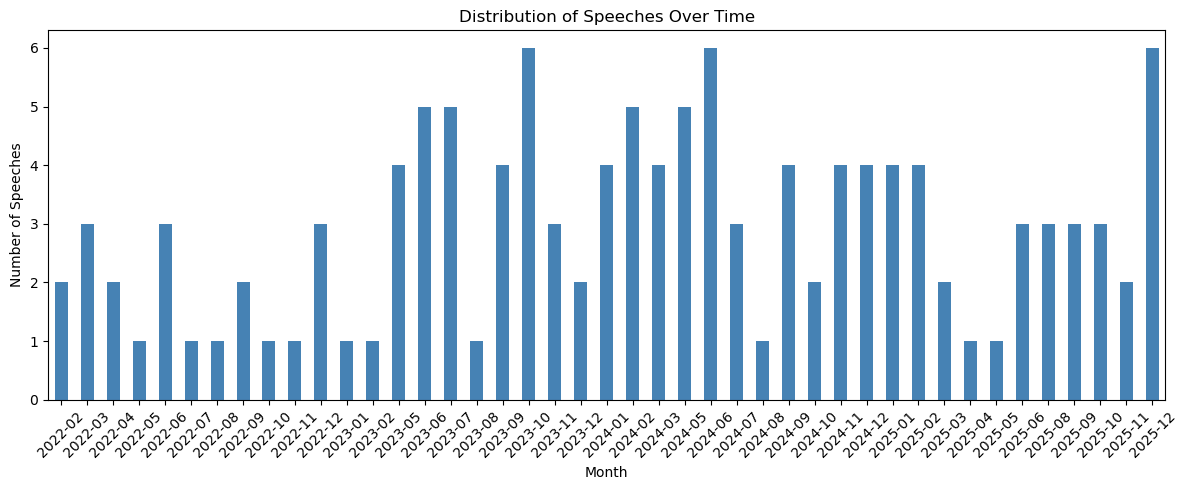

In [35]:
df = pd.read_csv('speech.csv')

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')

print(f"Total number of speeches: {len(df)}")

print("\nFirst 5 speeches:")
print(df[['date', 'title', 'word_count']].head())
print(f"\nDate range: {df['date'].min()} - {df['date'].max()}")

# 4. Basic statistics
print("\nWord count statistics:")
print(df['word_count'].describe())

# 5. Time distribution plot
plt.figure(figsize=(12, 5))
df.groupby('year_month').size().plot(kind='bar', color='steelblue')
plt.title('Distribution of Speeches Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

SMART STOPWORDS DETECTOR
SMART STOPWORDS DETECTOR - OPTIMIZED
Loading data: {csv_path}
Loaded rows: {len(self.df)}
Cleaning texts...
Cleaned speeches: 126
Total words: 747,047
Unique words: 17,296
STARTING FULL ANALYSIS PIPELINE
DETERMINING FINAL STOPWORDS

STATISTICAL ANALYSIS METHODS
BASIC STATISTICS:
Total words: 747,047
Unique words: 17,296
Average document length: 5929 words

HIGH FREQUENCY WORDS ANALYSIS:
   HIGH the          → %5.62 (document: %100.0)
   HIGH and          → %3.16 (document: %99.2)
   HIGH to           → %2.88 (document: %100.0)
   HIGH of           → %2.78 (document: %100.0)
   HIGH in           → %1.99 (document: %100.0)
   HIGH is           → %1.77 (document: %100.0)
   HIGH we           → %1.61 (document: %98.4)
   HIGH a            → %1.52 (document: %100.0)
   HIGH this         → %1.40 (document: %100.0)
   HIGH that         → %1.35 (document: %100.0)
   HIGH i            → %1.24 (document: %99.2)
   HIGH it           → %1.14 (document: %97.6)
   HIGH are  

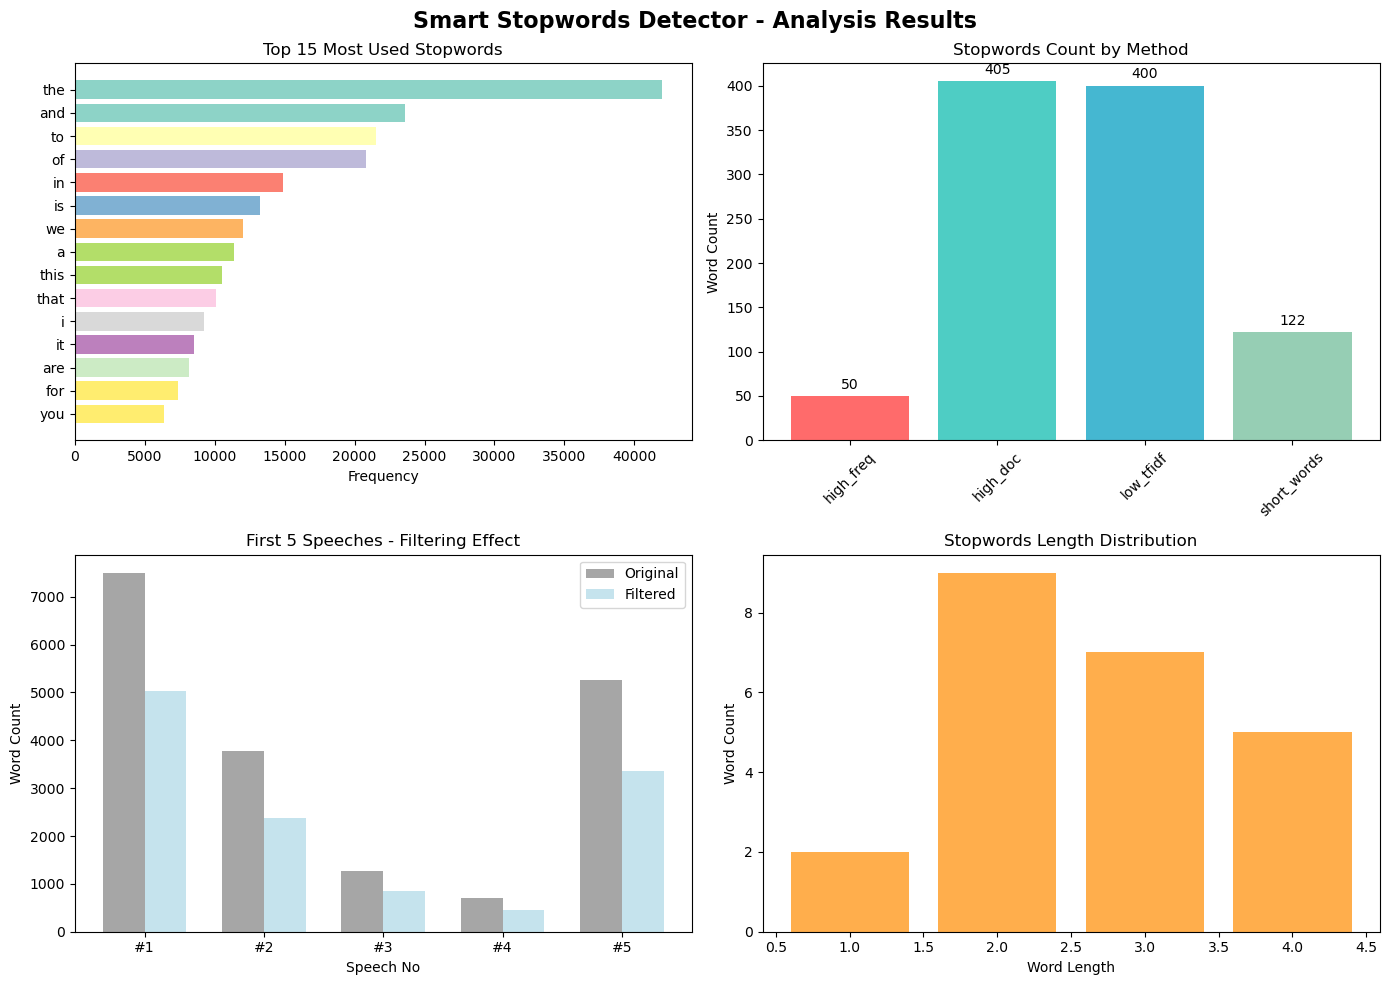

Visualizations created
SAVING RESULTS

SAVED FILES:
smart_stopwords_results/smart_stopwords.txt
smart_stopwords_results/filtered_speeches.csv
smart_stopwords_results/analysis_report.txt

All results: G:\Diğer bilgisayarlar\Dizüstü Bilgisayarım\Drive\putin\smart_stopwords_results/
ANALYSIS SUCCESSFULLY COMPLETED!
Total speeches: 126
Number of stopwords: 23
Reduction rate: %35.0
Target reduction: %35
CLOSE TO TARGET (difference: %0.0)

Results: in 'smart_stopwords_results/' folder


In [37]:
class SmartStopwordsDetectorOptimized:
    """
    Optimized smart stopwords detection class
    Specifically designed for Putin speeches
    """
    
    def __init__(self, csv_path, text_column='text', target_reduction=35):
        print("SMART STOPWORDS DETECTOR - OPTIMIZED")
        self.target_reduction = target_reduction
        self.text_column = text_column
        
        print("Loading data: {csv_path}")
        self.df = pd.read_csv(csv_path)
        print("Loaded rows: {len(self.df)}")
        
        self.prepare_texts()
        
        self.stopwords_results = {}
        self.final_stopwords = []
        
    def prepare_texts(self):
        print("Cleaning texts...")
        
        self.df[self.text_column] = self.df[self.text_column].fillna('')
        
        def advanced_clean(text):
            text = str(text).lower()
            
            text = re.sub(r'[^\w\s]', ' ', text)
            
            text = re.sub(r'\d+', '', text)
            
            text = re.sub(r'\s+', ' ', text).strip()
            
            return text
        
        self.df['cleaned_text'] = self.df[self.text_column].apply(advanced_clean)
        self.texts = self.df['cleaned_text'].tolist()
        
        total_words = sum(len(text.split()) for text in self.texts)
        unique_words = len(set(' '.join(self.texts).split()))
        
        print(f"Cleaned speeches: {len(self.texts)}")
        print(f"Total words: {total_words:,}")
        print(f"Unique words: {unique_words:,}")
    
    def get_core_english_stopwords(self):
        """Core English stopwords list"""
        return {
            # Articles
            'a', 'an', 'the',
            
            # Common pronouns
            'i', 'you', 'he', 'she', 'it', 'we', 'they',
            'me', 'him', 'her', 'us', 'them',
            'my', 'your', 'his', 'her', 'its', 'our', 'their',
            'mine', 'yours', 'hers', 'ours', 'theirs',
            
            # Common prepositions
            'in', 'on', 'at', 'by', 'for', 'with', 'about', 'against',
            'between', 'into', 'through', 'during', 'before', 'after',
            'above', 'below', 'to', 'from', 'up', 'down', 'out', 'off',
            'over', 'under', 'again', 'further',
            
            # Common conjunctions
            'and', 'but', 'or', 'nor', 'so', 'yet',
            'although', 'because', 'since', 'unless',
            
            # Common verbs (to be, to have, to do)
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
            'have', 'has', 'had', 'having',
            'do', 'does', 'did', 'doing',
            
            # Common adverbs
            'very', 'really', 'quite', 'just', 'only', 'also',
            'well', 'too', 'even', 'still', 'always', 'never',
            
            # Common determiners
            'this', 'that', 'these', 'those',
            'all', 'any', 'both', 'each', 'few', 'more', 'most',
            'other', 'some', 'such', 'no', 'nor', 'not', 'only',
            'own', 'same', 'so', 'than', 'too',
            
            # Question words
            'what', 'which', 'who', 'whom', 'whose',
            'when', 'where', 'why', 'how',
            
            # Modal verbs
            'will', 'would', 'can', 'could', 'shall', 'should',
            'may', 'might', 'must'
        }
    
    def get_putin_context_stopwords(self):
        """Context-specific stopwords for Putin speeches"""
        return {
            # Putin-specific verbs and auxiliary verbs
            'said', 'says', 'according', 'regarding', 'including',
            'within', 'without', 'upon', 'among', 'through',
            
            # Political terminology (general)
            'country', 'countries', 'state', 'states',
            'government', 'governments', 'people', 'peoples',
            'nation', 'national', 'international',
            
            # Time expressions (very general)
            'today', 'yesterday', 'tomorrow', 'now', 'then',
            'year', 'years', 'month', 'months', 'day', 'days',
            'time', 'times', 'period', 'periods',
            
            # Quantity expressions (very general)
            'many', 'much', 'more', 'most', 'several', 'various',
            
        }
    
    def analyze_statistical_methods(self):

        print("\nSTATISTICAL ANALYSIS METHODS")
        
        all_words = ' '.join(self.texts).split()
        word_counts = Counter(all_words)
        total_words = len(all_words)
        
        doc_freq = defaultdict(int)
        for text in self.texts:
            for word in set(text.split()):
                doc_freq[word] += 1
        
        N = len(self.texts)
        
        print(f"BASIC STATISTICS:")
        print(f"Total words: {total_words:,}")
        print(f"Unique words: {len(word_counts):,}")
        print(f"Average document length: {total_words/N:.0f} words")
        
        print("\nHIGH FREQUENCY WORDS ANALYSIS:")
        
        high_freq_words = []
        top_50 = word_counts.most_common(50)
        
        for word, freq in top_50:
            word_pct = (freq / total_words) * 100
            doc_pct = (doc_freq[word] / N) * 100
            
            if word_pct > 0.1:  # More than 0.1%
                high_freq_words.append((word, freq, word_pct, doc_pct))
                status = "HIGH" if word_pct > 0.5 else "MEDIUM"
                print(f"   {status} {word:12} → %{word_pct:.2f} (document: %{doc_pct:.1f})")
        
        self.stopwords_results['high_freq'] = {w[0] for w in high_freq_words}
        
        print("\nHIGH DOCUMENT FREQUENCY ANALYSIS:")
        
        high_doc_words = []
        for word, df in doc_freq.items():
            doc_pct = (df / N) * 100
            if doc_pct > 50:  # More than 50% of documents
                freq = word_counts[word]
                word_pct = (freq / total_words) * 100
                high_doc_words.append((word, freq, word_pct, doc_pct))
        
        high_doc_words.sort(key=lambda x: x[3], reverse=True)
        for word, freq, word_pct, doc_pct in high_doc_words[:20]:
            print(f"{word:12} → %{doc_pct:.1f} documents (frequency: %{word_pct:.2f})")
        
        self.stopwords_results['high_doc'] = {w[0] for w in high_doc_words}
        
        print("\nTF-IDF ANALYSIS (Low Importance Words):")
        
        tfidf_stopwords = self.tfidf_analysis()
        self.stopwords_results['low_tfidf'] = tfidf_stopwords
        
        print("\nSHORT WORDS ANALYSIS:")
        short_words = {w for w in word_counts if len(w) <= 2}
        self.stopwords_results['short_words'] = short_words
        
        short_impact = sum(word_counts[w] for w in short_words)
        print(f"{len(short_words)} short words")
        print(f"Total usage: {short_impact:,} (%{(short_impact/total_words)*100:.1f})")
        
        return self.stopwords_results
    
    def tfidf_analysis(self, low_percentile=20):
        try:
            vectorizer = TfidfVectorizer(
                max_features=2000,
                min_df=2,
                max_df=0.85,
                stop_words='english'
            )
            
            tfidf_matrix = vectorizer.fit_transform(self.texts)
            features = vectorizer.get_feature_names_out()
            scores = np.array(tfidf_matrix.mean(axis=0)).flatten()
            
            if scores.max() > scores.min():
                norm_scores = (scores - scores.min()) / (scores.max() - scores.min())
            else:
                norm_scores = scores
            
            threshold = np.percentile(norm_scores, low_percentile)
            
            low_tfidf_words = {word for word, score in zip(features, norm_scores) 
                              if score <= threshold}
            
            word_scores = [(word, score) for word, score in zip(features, norm_scores) 
                          if score <= threshold]
            word_scores.sort(key=lambda x: x[1])
            
            print(f"{len(low_tfidf_words)} low TF-IDF words")
            print(f"Threshold value: {threshold:.4f}")
            
            if word_scores:
                print(f"Examples: {', '.join([w[0] for w in word_scores[:10]])}")
            
            return low_tfidf_words
            
        except Exception as e:
            print(f"TF-IDF error: {e}")
            return set()
    
    def ensemble_voting(self, min_votes=2):

        print("ENSEMBLE VOTING SYSTEM")
        
        votes = defaultdict(int)
        all_words_set = set()
        
        for method, words in self.stopwords_results.items():
            for word in words:
                votes[word] += 1
                all_words_set.add(word)
        
        print(f"\nVOTE DISTRIBUTION:")
        vote_distribution = defaultdict(int)
        for word, vote_count in votes.items():
            vote_distribution[vote_count] += 1
        
        for vote_count in sorted(vote_distribution.keys()):
            count = vote_distribution[vote_count]
            print(f"   Selected by {vote_count} methods: {count} words")
        
        majority_stopwords = {word for word, vote_count in votes.items() 
                             if vote_count >= min_votes}
        
        print(f"\nENSEMBLE RESULTS:")
        print(f"   Total candidates: {len(all_words_set)}")
        print(f"   Majority ({min_votes}+ votes): {len(majority_stopwords)}")
        
        return majority_stopwords
    
    def optimize_for_target(self, candidate_stopwords):

        print(f"TARGET OPTIMIZATION: %{self.target_reduction} REDUCTION")

        all_words = ' '.join(self.texts).split()
        word_counts = Counter(all_words)
        total_words = len(all_words)
        
        candidate_freq = [(w, word_counts.get(w, 0)) for w in candidate_stopwords 
                         if w in word_counts]
        candidate_freq.sort(key=lambda x: x[1], reverse=True)
        
        target_freq = total_words * (self.target_reduction / 100)
        
        optimal_stopwords = []
        accumulated_freq = 0
        
        for word, freq in candidate_freq:
            if accumulated_freq + freq <= target_freq:
                optimal_stopwords.append(word)
                accumulated_freq += freq
            else:
                if (target_freq - accumulated_freq) / target_freq > 0.1:
                    optimal_stopwords.append(word)
                    accumulated_freq += freq
        
        coverage = (accumulated_freq / total_words) * 100
        
        print(f"\nOPTIMIZATION RESULTS:")
        print(f"   Initial candidates: {len(candidate_freq)}")
        print(f"   Selected stopwords: {len(optimal_stopwords)}")
        print(f"   Target frequency: {target_freq:,.0f}")
        print(f"   Achieved: {accumulated_freq:,.0f}")
        print(f"   COVERAGE RATE: %{coverage:.1f}")
        
        # Ideal range check
        if 25 <= coverage <= 45:
            print(f"WITHIN OPTIMAL RANGE (%25-%45)")
        elif coverage < 25:
            print(f"LOW COVERAGE, more aggressive filtering may be needed")
        else:
            print(f"HIGH COVERAGE, more selective filtering may be needed")
        
        return optimal_stopwords
    
    def get_final_stopwords(self):

        print("DETERMINING FINAL STOPWORDS")

        self.analyze_statistical_methods()
        
        candidate_stopwords = self.ensemble_voting(min_votes=2)
        
        core_stopwords = self.get_core_english_stopwords()
        context_stopwords = self.get_putin_context_stopwords()
        
        all_candidates = candidate_stopwords | core_stopwords | context_stopwords
        
        self.final_stopwords = self.optimize_for_target(all_candidates)
        
        self.show_final_statistics()
        
        return self.final_stopwords
    
    def show_final_statistics(self):

        all_words = ' '.join(self.texts).split()
        word_counts = Counter(all_words)
        total_words = len(all_words)
        

        stopwords_set = set(self.final_stopwords)
        stopwords_freq = sum(word_counts.get(w, 0) for w in stopwords_set)
        coverage = (stopwords_freq / total_words) * 100
        
        print(f"\nFINAL STATISTICS:")
        print(f"   Number of stopwords: {len(self.final_stopwords)}")
        print(f"   Covered words: {stopwords_freq:,}")
        print(f"   Total words: {total_words:,}")
        print(f"   COVERAGE RATE: %{coverage:.1f}")
        
        print(f"\nTOP 25 MOST EFFECTIVE STOPWORDS:")
        
        stopword_stats = []
        for word in self.final_stopwords:
            freq = word_counts.get(word, 0)
            if freq > 0:
                pct = (freq / total_words) * 100
                stopword_stats.append((word, freq, pct))
        
        stopword_stats.sort(key=lambda x: x[1], reverse=True)
        
        for i, (word, freq, pct) in enumerate(stopword_stats[:25], 1):
            doc_count = sum(1 for text in self.texts if word in text)
            doc_pct = (doc_count / len(self.texts)) * 100
            print(f"{i:2}. {word:15} → {freq:6,} times (%{pct:.2f}) | %{doc_pct:.0f} documents")
    
    def apply_stopwords_filter(self):

        print("APPLYING STOPWORDS FILTER")

        stopwords_set = set(self.final_stopwords)
        
        def filter_text(text):
            words = text.split()
            filtered = [w for w in words if w not in stopwords_set]
            return ' '.join(filtered)
        
        self.df['filtered_text'] = self.df['cleaned_text'].apply(filter_text)
        
        original_counts = [len(t.split()) for t in self.texts]
        filtered_counts = [len(t.split()) for t in self.df['filtered_text']]
        
        original_total = sum(original_counts)
        filtered_total = sum(filtered_counts)
        reduction_pct = ((original_total - filtered_total) / original_total) * 100
        
        print(f"\nFILTERING RESULTS:")
        print(f"   Original total: {original_total:,} words")
        print(f"   Filtered: {filtered_total:,} words")
        print(f"   Removed: {original_total - filtered_total:,} words")
        print(f"   REDUCTION RATE: %{reduction_pct:.1f}")
        
        print(f"\nEXAMPLE COMPARISON:")
        sample_idx = min(2, len(self.df) - 1)
        
        original_text = self.texts[sample_idx]
        filtered_text = self.df['filtered_text'].iloc[sample_idx]
        
        print(f"Speech #{sample_idx + 1}:")
        print(f"Original: {len(original_text.split())} words")
        print(f"Filtered: {len(filtered_text.split())} words")
        print(f"Removed: {len(original_text.split()) - len(filtered_text.split())} words")
        
        print(f"\n Filtered text (first 250 characters):")
        print(f"\"{filtered_text[:250]}...\"")
        
        return reduction_pct
    
    def save_results(self, output_dir='smart_stopwords_results'):

        print("SAVING RESULTS")

        os.makedirs(output_dir, exist_ok=True)
        
        stopwords_file = f'{output_dir}/smart_stopwords.txt'
        with open(stopwords_file, 'w', encoding='utf-8') as f:
            f.write("# SMART STOPWORDS DETECTOR - OPTIMIZED RESULTS\n")
            f.write(f"# Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"# Total speeches: {len(self.texts)}\n")
            f.write(f"# Number of stopwords: {len(self.final_stopwords)}\n")
            f.write(f"# Target reduction: %{self.target_reduction}\n\n")
            
            all_words = ' '.join(self.texts).split()
            word_counts = Counter(all_words)
            
            f.write("WORD | FREQUENCY | PERCENTAGE | DOCUMENT_PERCENTAGE\n")
            f.write("-"*50 + "\n")
            
            for word in self.final_stopwords:
                freq = word_counts.get(word, 0)
                word_pct = (freq / len(all_words)) * 100 if len(all_words) > 0 else 0
                doc_count = sum(1 for text in self.texts if word in text)
                doc_pct = (doc_count / len(self.texts)) * 100
                
                f.write(f"{word:<20} | {freq:>8,} | %{word_pct:>5.2f} | %{doc_pct:>5.1f}\n")
        
        filtered_file = f'{output_dir}/filtered_speeches.csv'
        self.df.to_csv(filtered_file, index=False, encoding='utf-8')
        
        report_file = f'{output_dir}/analysis_report.txt'
        self.create_analysis_report(report_file)
        
        print(f"\nSAVED FILES:")
        print(f"{stopwords_file}")
        print(f"{filtered_file}")
        print(f"{report_file}")
        print(f"\nAll results: {os.path.abspath(output_dir)}/")
    
    def create_analysis_report(self, report_file):
        all_words = ' '.join(self.texts).split()
        word_counts = Counter(all_words)
        total_words = len(all_words)
        
        with open(report_file, 'w', encoding='utf-8') as f:
            f.write("SMART STOPWORDS DETECTOR - ANALYSIS REPORT\n")
            
            f.write(f"ANALYSIS DATE: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"DATASET: {len(self.texts)} speeches\n")
            f.write(f"TOTAL WORDS: {total_words:,}\n")
            f.write(f"UNIQUE WORDS: {len(word_counts):,}\n")
            f.write(f"TARGET REDUCTION: %{self.target_reduction}\n\n")
            
            f.write("\nSTOPWORDS ANALYSIS:\n")
            
            for method, words in self.stopwords_results.items():
                f.write(f"\n{method.upper()}:\n")
                f.write(f"  Word count: {len(words)}\n")
                
                # First 10 words
                sorted_words = sorted(words, key=lambda x: word_counts.get(x, 0), reverse=True)
                f.write(f"  Examples: {', '.join(list(sorted_words)[:10])}\n")
            
            f.write("FINAL STOPWORDS STATISTICS:\n")
            
            stopwords_set = set(self.final_stopwords)
            stopwords_freq = sum(word_counts.get(w, 0) for w in stopwords_set)
            coverage = (stopwords_freq / total_words) * 100
            
            f.write(f"Total stopwords: {len(self.final_stopwords)}\n")
            f.write(f"Covered words: {stopwords_freq:,}\n")
            f.write(f"Coverage rate: %{coverage:.1f}\n\n")
            
            f.write("TOP 50 MOST EFFECTIVE STOPWORDS:\n")
            
            stopword_stats = []
            for word in self.final_stopwords:
                freq = word_counts.get(word, 0)
                if freq > 0:
                    pct = (freq / total_words) * 100
                    stopword_stats.append((word, freq, pct))
            
            stopword_stats.sort(key=lambda x: x[1], reverse=True)
            
            for i, (word, freq, pct) in enumerate(stopword_stats[:50], 1):
                doc_count = sum(1 for text in self.texts if word in text)
                doc_pct = (doc_count / len(self.texts)) * 100
                f.write(f"{i:3}. {word:<20} {freq:>8,} times (%{pct:>5.2f}) | %{doc_pct:>5.1f} documents\n")
    
    def visualize_results(self):
        print("CREATING VISUALIZATIONS")
        try:
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))
            fig.suptitle('Smart Stopwords Detector - Analysis Results', 
                        fontsize=16, fontweight='bold')
            
            all_words = ' '.join(self.texts).split()
            word_counts = Counter(all_words)
            stopwords_set = set(self.final_stopwords)
            
            ax1 = axes[0, 0]
            top_stopwords = sorted(stopwords_set, 
                                  key=lambda x: word_counts.get(x, 0), 
                                  reverse=True)[:15]
            top_freqs = [word_counts.get(w, 0) for w in top_stopwords]
            
            colors = plt.cm.Set3(np.linspace(0, 1, len(top_stopwords)))
            ax1.barh(range(len(top_stopwords)), top_freqs, color=colors)
            ax1.set_yticks(range(len(top_stopwords)))
            ax1.set_yticklabels(top_stopwords)
            ax1.set_xlabel('Frequency')
            ax1.set_title('Top 15 Most Used Stopwords')
            ax1.invert_yaxis()
            
            ax2 = axes[0, 1]
            methods = list(self.stopwords_results.keys())
            method_counts = [len(words) for words in self.stopwords_results.values()]
            
            bars = ax2.bar(methods, method_counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
            ax2.set_title('Stopwords Count by Method')
            ax2.set_ylabel('Word Count')
            ax2.tick_params(axis='x', rotation=45)
            
            for bar in bars:
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
                        f'{int(height)}', ha='center', va='bottom')
            
            ax3 = axes[1, 0]
            original_counts = [len(t.split()) for t in self.texts[:5]]
            filtered_counts = [len(t.split()) for t in self.df['filtered_text'][:5]]
            
            x = range(len(original_counts))
            width = 0.35
            ax3.bar([i - width/2 for i in x], original_counts, width, 
                   label='Original', color='gray', alpha=0.7)
            ax3.bar([i + width/2 for i in x], filtered_counts, width, 
                   label='Filtered', color='lightblue', alpha=0.7)
            ax3.set_title('First 5 Speeches - Filtering Effect')
            ax3.set_xlabel('Speech No')
            ax3.set_ylabel('Word Count')
            ax3.set_xticks(x)
            ax3.set_xticklabels([f'#{i+1}' for i in x])
            ax3.legend()
            
            ax4 = axes[1, 1]
            stopword_lengths = [len(w) for w in stopwords_set]
            length_counts = Counter(stopword_lengths)
            
            lengths = sorted(length_counts.keys())
            counts = [length_counts[l] for l in lengths]
            
            ax4.bar(lengths, counts, color='darkorange', alpha=0.7)
            ax4.set_title('Stopwords Length Distribution')
            ax4.set_xlabel('Word Length')
            ax4.set_ylabel('Word Count')
            
            plt.tight_layout()
            plt.show()
            
            print("Visualizations created")
            
        except Exception as e:
            print(f"Visualization error: {e}")
    
    def run_full_analysis(self):
        print("STARTING FULL ANALYSIS PIPELINE")

        try:
            stopwords = self.get_final_stopwords()
            
            reduction = self.apply_stopwords_filter()
            
            self.visualize_results()
            
            self.save_results()
            
            print("ANALYSIS SUCCESSFULLY COMPLETED!")
            print(f"Total speeches: {len(self.texts)}")
            print(f"Number of stopwords: {len(stopwords)}")
            print(f"Reduction rate: %{reduction:.1f}")
            print(f"Target reduction: %{self.target_reduction}")
            
            if abs(reduction - self.target_reduction) <= 10:
                print(f"CLOSE TO TARGET (difference: %{abs(reduction - self.target_reduction):.1f})")
            else:
                print(f"FAR FROM TARGET (difference: %{abs(reduction - self.target_reduction):.1f})")
            print(f"\nResults: in 'smart_stopwords_results/' folder")
            
            return {
                'stopwords': stopwords,
                'reduction': reduction,
                'target': self.target_reduction,
                'success': abs(reduction - self.target_reduction) <= 10
            }    
        except Exception as e:
            print(f"ANALYSIS ERROR: {e}")
            return None

def run_smart_stopwords_detection(csv_path, target_reduction=35):

    print("SMART STOPWORDS DETECTOR")
    
    if not 20 <= target_reduction <= 50:
        print(f"Target reduction ({target_reduction}%) outside recommended range (20-50%)")
        print("Continuing with default optimization...")
    
    try:
        detector = SmartStopwordsDetectorOptimized(
            csv_path=csv_path,
            text_column='text',
            target_reduction=target_reduction
        )
        
        results = detector.run_full_analysis()
        
    except FileNotFoundError:
        print(f"\nERROR: '{csv_path}' file not found!")
        print("Please check the file path.")
    except Exception as e:
        print(f"\nERROR: {e}")


if __name__ == "__main__":
    CSV_FILE = "speech.csv"
    TARGET_REDUCTION = 35
    run_smart_stopwords_detection(CSV_FILE, TARGET_REDUCTION)


 ENHANCED PUTIN SPEECHES ANALYSIS


Enter random seed (empty=42):  42
Enter topic count (2-8, empty=5):  5



 SETTINGS:
Random seed: 42
Topic count: 5



 Press ENTER to start analysis (Seed: 42)... 


LDA ANALYSIS
✓ 126 speeches loaded
✓ Date range: 2022-02 - 2025-12

 TEXT CLEANING...
Total words: 307,734
Unique words: 16,590
Average words/speech: 2442
 STARTING ENHANCED LDA ANALYSIS
 Topic count: 5

 DOCUMENT-TERM MATRIX CREATION...
N-gram: 2-4
Max features: 1200
Min DF: 3
Max DF: %50
Random seed: 42
 Document count: 126
 Term count: 1200

 TOP 15 N-GRAMS:
--------------------------------------------------
  soviet union                             →    188 times (%0.90)
  defence ministry                         →    128 times (%0.61)
  kiev regime                              →    119 times (%0.57)
  middle east                              →    117 times (%0.56)
  great patriotic                          →    110 times (%0.53)
  artificial intelligence                  →     93 times (%0.45)
  central bank                             →     84 times (%0.40)
  russia china                             →     79 times (%0.38)
  economic growth                          →     78 times

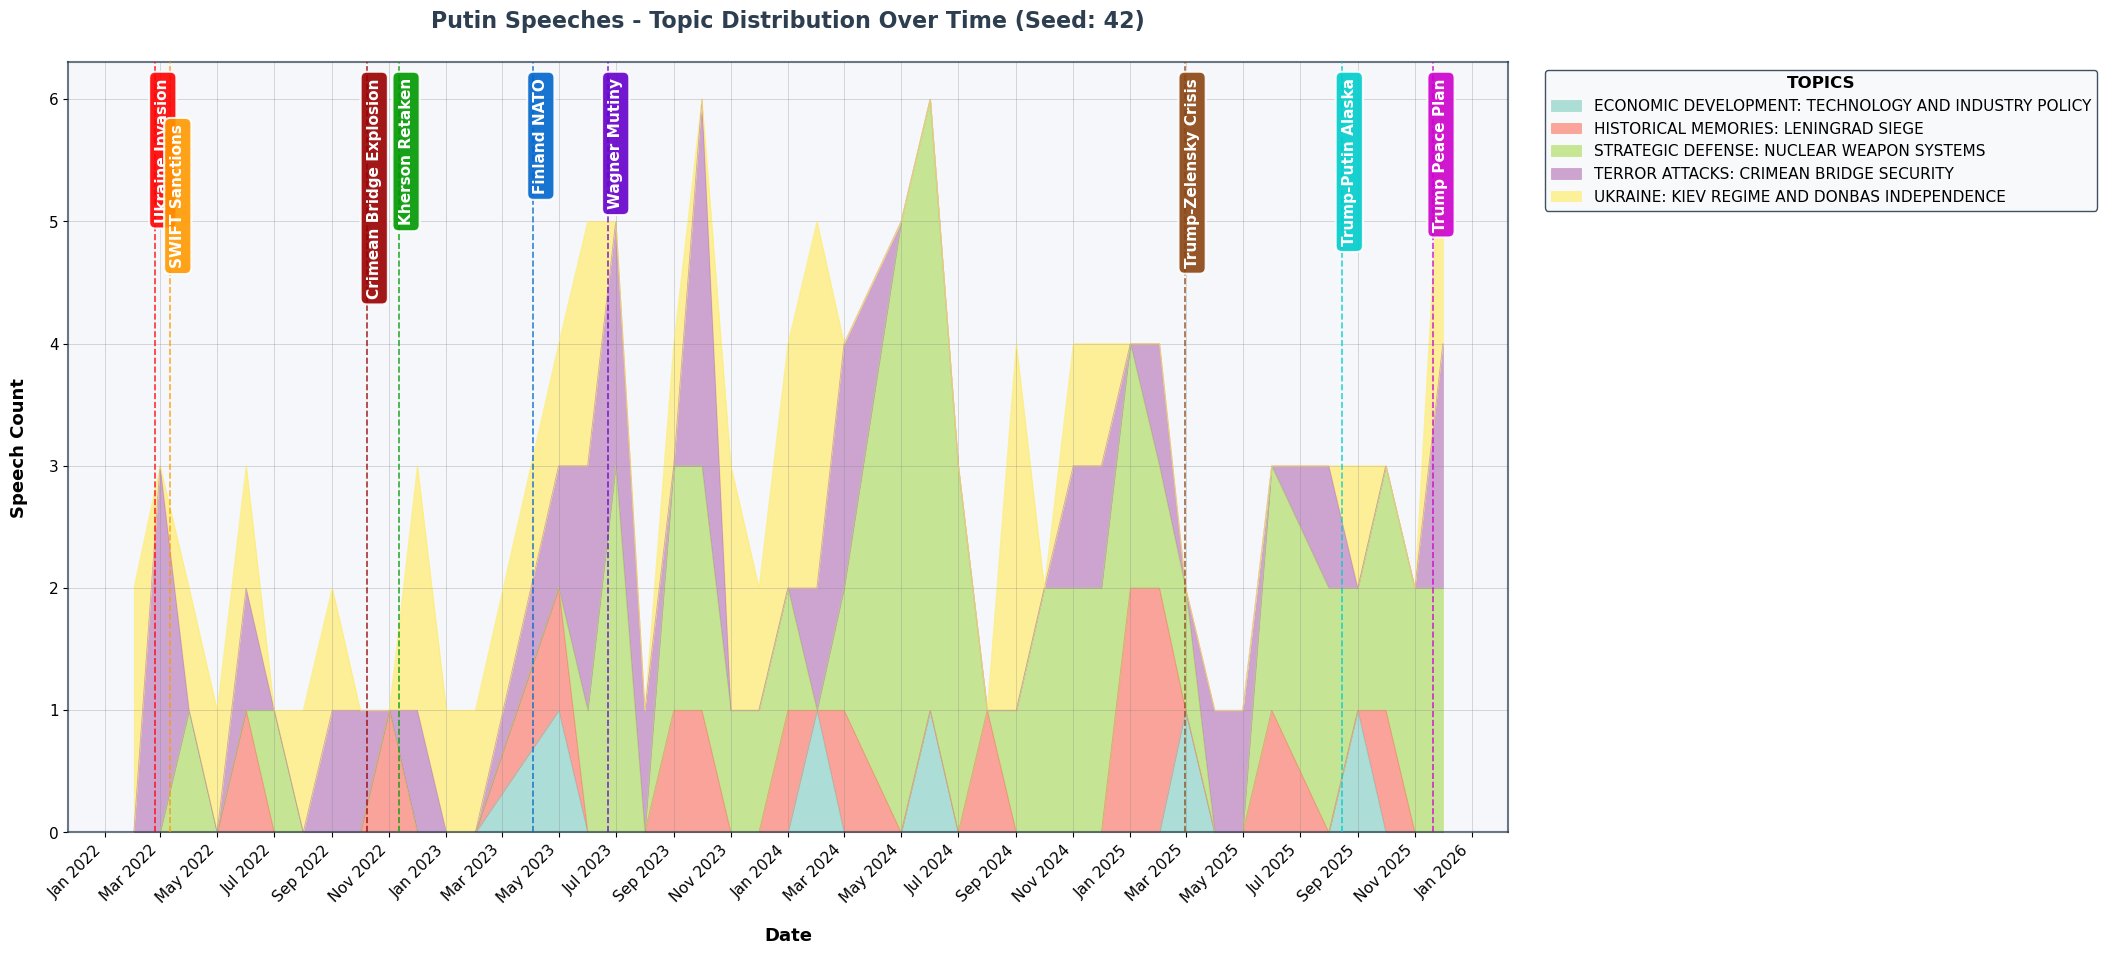

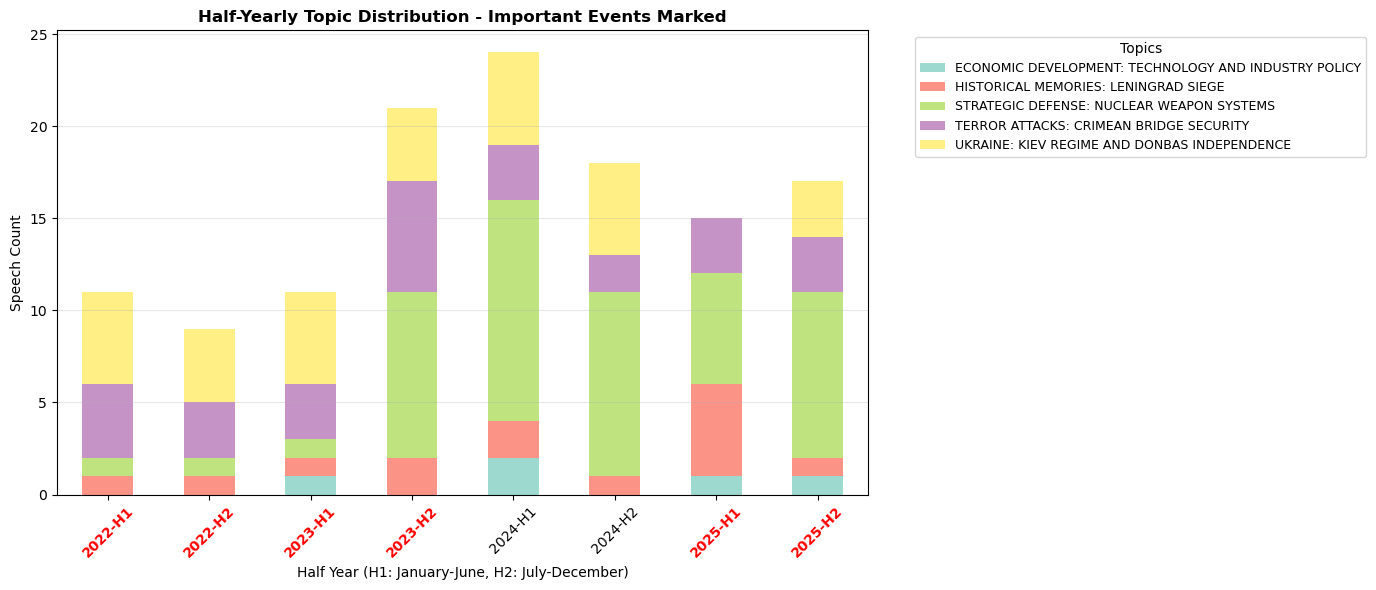


 TOPIC-BASED HALF-YEARLY DISTRIBUTION TABLE:

Half Year    | ECONOMIC DEVELOPMENT... | HISTORICAL MEMORIES:... | STRATEGIC DEFENSE: N... | TERROR ATTACKS: CRIM... | UKRAINE: KIEV REGIME... | Total
------------------------------------------------------------------------------------------------------------------------------------
2022-H1      |  -                    1 (%  9.1)            1 (%  9.1)            4 (% 36.4)            5 (% 45.5)          |   11
2022-H2      |  -                    1 (% 11.1)            1 (% 11.1)            3 (% 33.3)            4 (% 44.4)          |    9
2023-H1      |   1 (%  9.1)            1 (%  9.1)            1 (%  9.1)            3 (% 27.3)            5 (% 45.5)          |   11
2023-H2      |  -                    2 (%  9.5)            9 (% 42.9)            6 (% 28.6)            4 (% 19.0)          |   21
2024-H1      |   2 (%  8.3)            2 (%  8.3)           12 (% 50.0)            3 (% 12.5)            5 (% 20.8)          |   24
2024-H2      | 

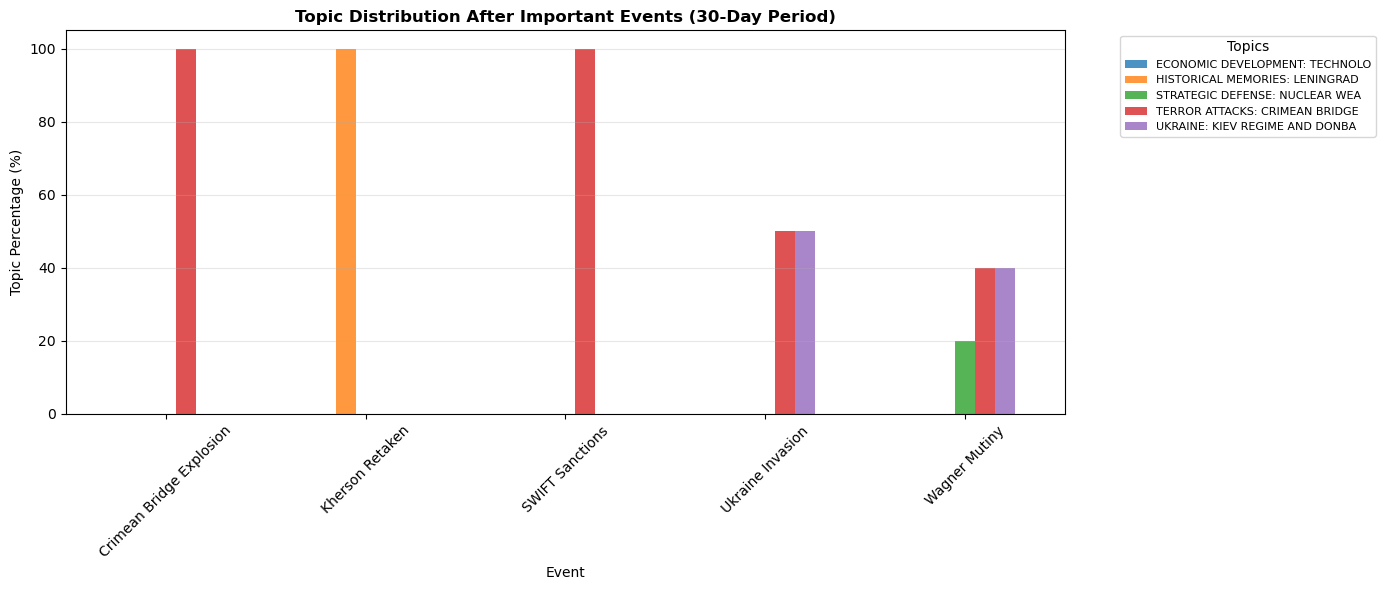

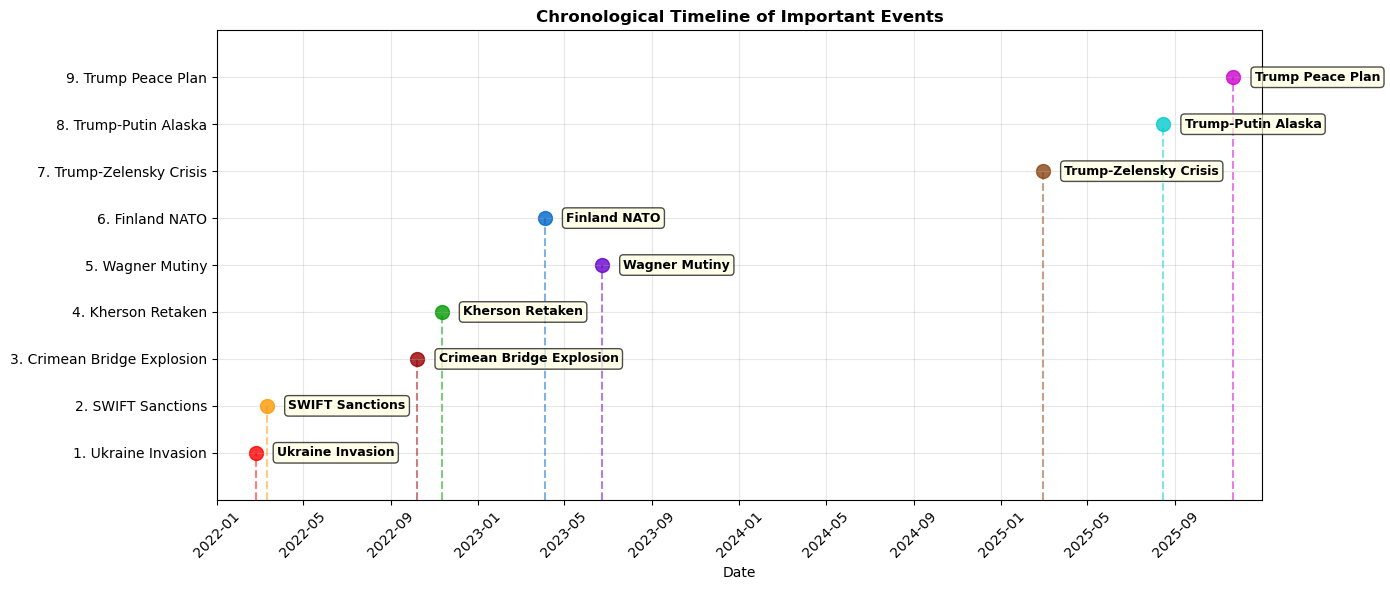


 TIME ANALYSIS STATISTICS:
• Most active month: 2023-10 (6 speeches)
• Most active half-year: 2024-H1 (24 speeches)

 HALF-YEARLY TOPIC TRENDS:
  ECONOMIC DEVELOPMENT: TECHNOLOGY AN...   → STABLE
  HISTORICAL MEMORIES: LENINGRAD SIEG...   → STRONG INCREASE
  STRATEGIC DEFENSE: NUCLEAR WEAPON S...   → SHARP DECREASE
  TERROR ATTACKS: CRIMEAN BRIDGE SECU...   → INCREASING
  UKRAINE: KIEV REGIME AND DONBAS IND...   → SHARP DECREASE

 IMPORTANT EVENTS ANALYSIS:
--------------------------------------------------

 Ukraine Invasion (24.02.2022):
   • Previous 30 days: 1 speeches
   • Next 30 days: 3 speeches
   • Change: +200.0%
   • UKRAINE: KIEV REGIME AND DONBA: 100.0% → 0.0% (-100.0%)
   • TERROR ATTACKS: CRIMEAN BRIDGE: 0.0% → 100.0% (+100.0%)

 SWIFT Sanctions (12.03.2022):
   • Previous 30 days: 4 speeches
   • Next 30 days: 1 speeches
   • Change: -75.0%
   • UKRAINE: KIEV REGIME AND DONBA: 50.0% → 0.0% (-50.0%)
   • TERROR ATTACKS: CRIMEAN BRIDGE: 50.0% → 100.0% (+50.0%)

 Crimean 

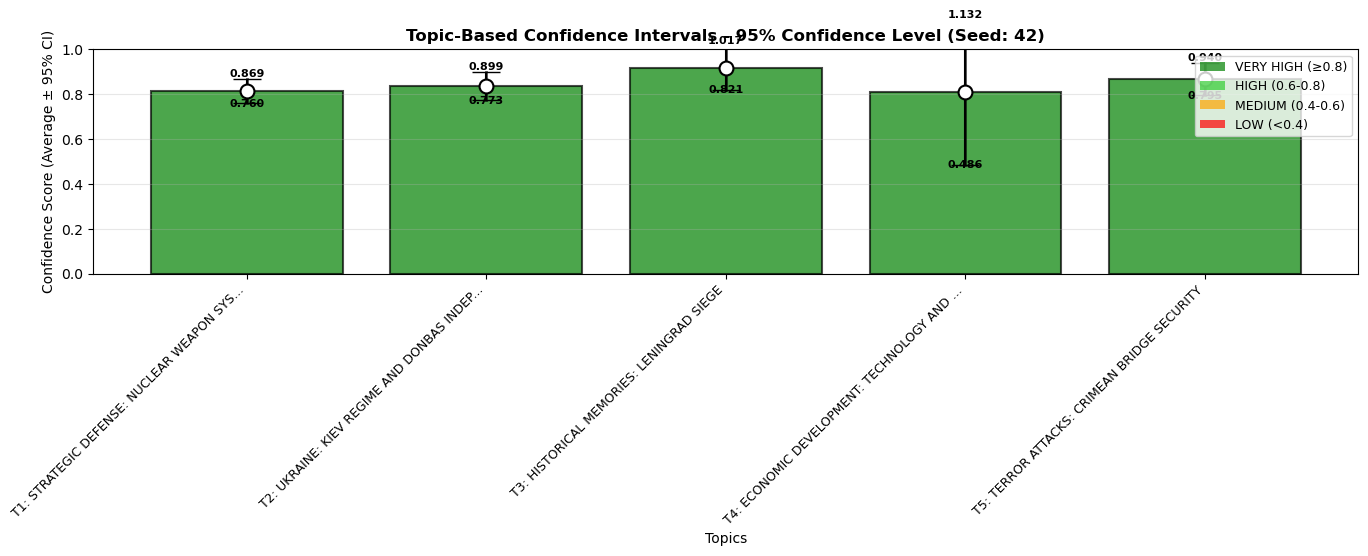

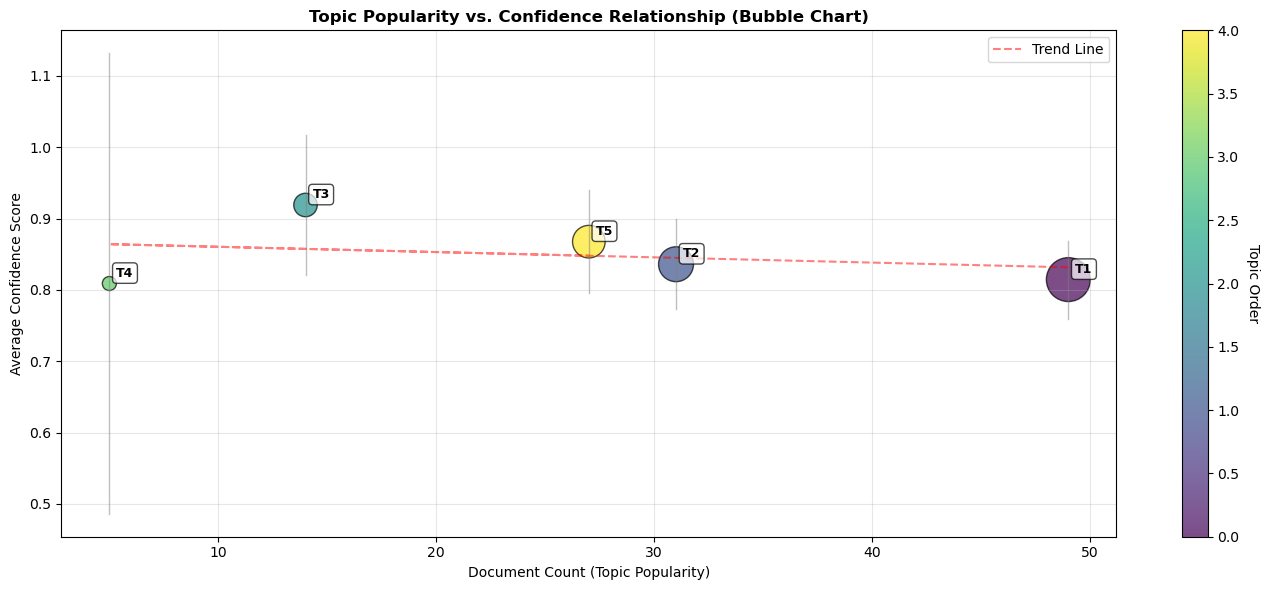

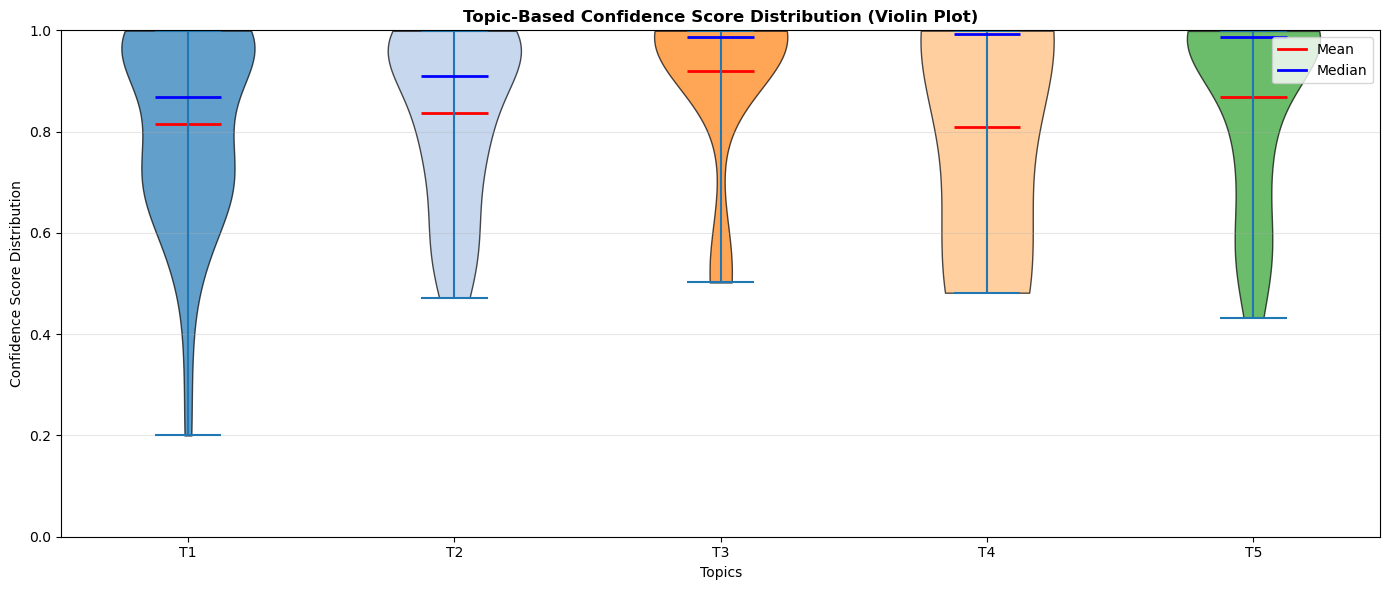

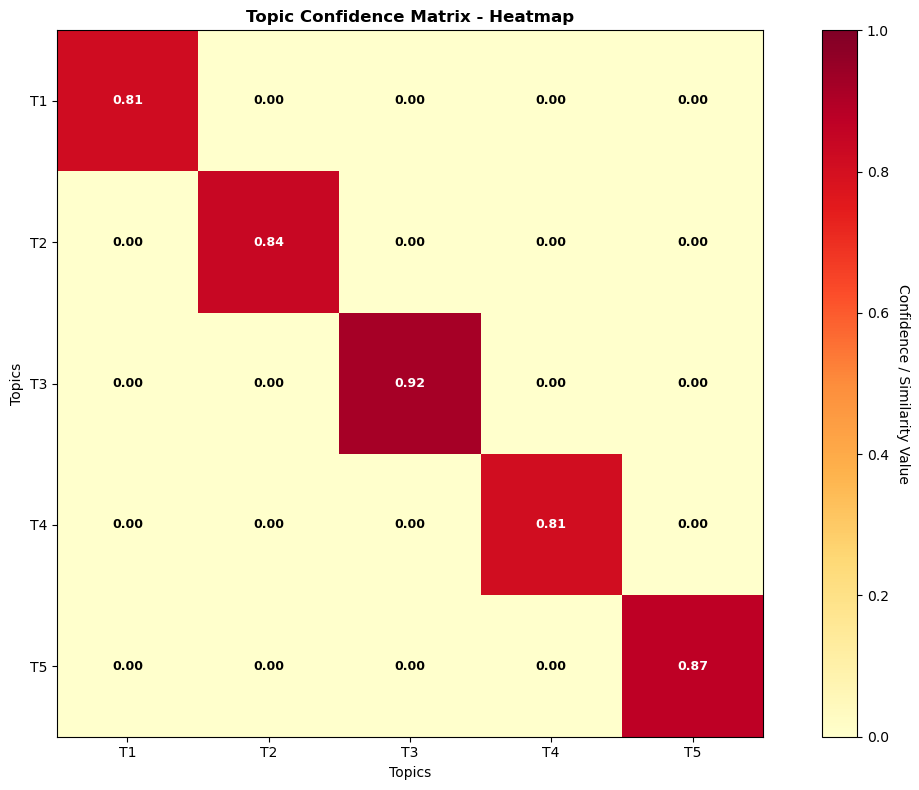


 TOPIC CONFIDENCE STATISTICS:
Overall average confidence: 0.849 ± 0.045
Highest confidence: Topic 3 (0.919)
Lowest confidence: Topic 4 (0.809)
Confidence range width: 0.110

 CONFIDENCE LEVEL DISTRIBUTION:
  • VERY HIGH: 5 topics (%100.0)

 ENHANCED STATISTICS (Seed: 42):

 GENERAL PERFORMANCE:
Average confidence: %84.3
Total speeches: 126
Topic count: 5

 TOPIC DIVERSITY:
  • Unique labels: 5/5
 EXCELLENT: All topics have unique labels!

 TOPIC-BASED DISTRIBUTION:

 Topic                                       Label  Documents    % Avg. Confidence                                                                                           Key Keywords
     1 STRATEGIC DEFENSE: NUCLEAR WEAPON SYSTEM...         49 38.9           81.4%           soviet union, artificial intelligence, south africa, russia china, kiev regime, central bank
     2 UKRAINE: KIEV REGIME AND DONBAS INDEPEND...         31 24.6           83.6%     defence ministry, soviet union, military personnel, defence industry,

In [39]:
class LDA:
    
    def __init__(self, csv_path, random_seed=42, n_topics=None):
        print("LDA ANALYSIS")
        
        self.random_seed = random_seed
        np.random.seed(self.random_seed)
        random.seed(self.random_seed)
        
        self.df = pd.read_csv(csv_path)
        
        if 'date' in self.df.columns:
            self.df['date'] = pd.to_datetime(self.df['date'], errors='coerce')
            self.df = self.df.dropna(subset=['date'])
            self.df['year'] = self.df['date'].dt.year
            self.df['month'] = self.df['date'].dt.month
            self.df['quarter'] = self.df['date'].dt.quarter
            self.df['year_month'] = self.df['date'].dt.to_period('M')
            self.df['year_quarter'] = self.df['date'].dt.to_period('Q')
        
        print(f"✓ {len(self.df)} speeches loaded")
        if 'date' in self.df.columns:
            print(f"✓ Date range: {self.df['date'].min().strftime('%Y-%m')} - {self.df['date'].max().strftime('%Y-%m')}")
        
        self.prepare_texts_enhanced()
        self.n_topics = n_topics
    
    def prepare_texts_enhanced(self):
        print("\n TEXT CLEANING...")
        
        if 'filtered_text' in self.df.columns:
            raw_texts = self.df['filtered_text'].fillna('').tolist()
        else:
            raw_texts = self.df['text'].fillna('').tolist()
        UPDATED_STOPWORDS = set([
            'i', 'me', 'my', 'myself', 'we', 'us', 'our', 'ours', 'ourselves',
            'you', 'your', 'yours', 'yourself', 'yourselves',
            'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
            'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'there', 'these',
            'be', 'is', 'am', 'are', 'was', 'were', 'been', 'being',
            'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
            'say', 'says', 'said',
            'the', 'a', 'an', 'and', 'or', 'but', 'if', 'because', 'as',
            'what', 'which', 'who', 'whom', 'whose', 'where', 'when', 'how', 'why',
            'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
            'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
            'too', 'very', 'can', 'will', 'just', 'should', 'now',
            'question', 'year', 'then', 'yes', 'no',
            'many', 'much', 'also', 'very', 'really',
            'well', 'good', 'better', 'best',
            'putin', 'vladimir', 'president',
            'thank', 'thanks', 'thank you', 'ladies gentlemen',
            'ladies', 'gentlemen',
            'million tonnes', 'billion rubles', 'million dollars', 'billion dollars',
            'trillion rubles', 'thousand tonnes',
            'three years', 'eight years', 'past years', 'recent years',
            'next years', 'coming years', 'previous years',
            'large scale', 'small scale', 'high level', 'low level',
            'great deal', 'first time', 'last time',
            'compared with', 'compared to', 'in comparison',
            'million', 'billion', 'trillion', 'thousand',
            'tonnes', 'rubles', 'dollars', 'euros',
            'years', 'months', 'weeks', 'days', 'talking', 'about', 'first', 'point',
            'between', 'think', 'about', 'during', 'dmitry', 'peskov', 'pavel', 'zarubin',
            'would', 'like', 'would like', 'russian', 'federation', 'into', 'account', 'comrade',
            'saudi', 'arabia', 'please', 'ahead', 'alexander', 'lukashenko', 'families', 'children',
            'fyodor', 'lukyanov', 'over','past', 'people', 'republic','prime', 'minister',
            'long', 'term','time',
            'afternoon', 'name','lvova', 'belova', 'kherson','konstantin', 'panyushkin',
            'proceed','from','around','world',
            'commander','chief','extremely','important','large','scale','small','medium','sized',
            'among','things','make','sure','minimum','wage',
            'medical', 'check', 'everything','done', 'continue','work','took','part','even' ,'though',
            'arab', 'emirates','percent','business','countries','taking', 'place', 'without', 'doubt','want','emphasise'

        ])
        
        def enhanced_clean_text(text):
            text = str(text).lower()
            
            text = re.sub(r'[^\w\s]', ' ', text)
            text = re.sub(r'\d+', '', text)
            
            words = text.split()
            
            filtered_words = []
            for w in words:
                if len(w) < 4: 
                    continue
                if w in UPDATED_STOPWORDS:
                    continue
                filtered_words.append(w)
            
            cleaned_text = ' '.join(filtered_words)
            cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
            
            return cleaned_text
        
        self.texts = []
        for i, t in enumerate(raw_texts):
            cleaned = enhanced_clean_text(t)
            self.texts.append(cleaned)
        
        total_words = sum(len(t.split()) for t in self.texts)
        unique_words = len(set(' '.join(self.texts).split()))
        
        print(f"Total words: {total_words:,}")
        print(f"Unique words: {unique_words:,}")
        print(f"Average words/speech: {total_words/len(self.texts):.0f}")
        
        return self.texts
    
    def create_dtm_enhanced(self, n_topics=5):
        print("\n DOCUMENT-TERM MATRIX CREATION...")
        
        if n_topics == 5:
            max_features = 1200 
            min_df = 3 
            max_df = 0.5 
            ngram_range = (2, 4)
        else:
            max_features = 1000
            min_df = 4
            max_df = 0.6
            ngram_range = (2, 3)
        
        print(f"N-gram: {ngram_range[0]}-{ngram_range[1]}")
        print(f"Max features: {max_features}")
        print(f"Min DF: {min_df}")
        print(f"Max DF: %{max_df*100:.0f}")
        print(f"Random seed: {self.random_seed}")
        
        self.vectorizer = CountVectorizer(
            max_features=max_features,
            min_df=min_df,
            max_df=max_df,
            stop_words=None,
            ngram_range=ngram_range,
            lowercase=True,
            token_pattern=r'\b[a-zA-Z]{4,}\b', 
        )
        
        self.dtm = self.vectorizer.fit_transform(self.texts)
        
        print(f" Document count: {self.dtm.shape[0]}")
        print(f" Term count: {self.dtm.shape[1]}")
        
        feature_names = self.vectorizer.get_feature_names_out()
        term_freq = np.asarray(self.dtm.sum(axis=0)).flatten()
        top_indices = term_freq.argsort()[-15:][::-1]
        
        print(f"\n TOP 15 N-GRAMS:")
        print("-" * 50)
        for idx in top_indices[:15]:
            term = feature_names[idx]
            freq = term_freq[idx]
            percentage = (freq / self.dtm.sum()) * 100
            print(f"  {term:40} → {freq:6,} times (%{percentage:.2f})")
        
        return self.dtm
    
    def perform_lda_enhanced(self, n_topics=5):
        print(f" LDA ANALYSIS ({n_topics} TOPICS)")
        print(f"\n LDA PARAMETERS:")
        print(f"Topic count: {n_topics}")
        print(f"Random seed: {self.random_seed}")
        print(f"Max iterations: 50")
        print(f"Doc-topic prior: 0.1")
        print(f"Topic-word prior: 0.01")
        print(f"Learning decay: 0.7")
        
        self.lda = LatentDirichletAllocation(
            n_components=n_topics,
            random_state=self.random_seed,
            learning_method='online',
            max_iter=50,  # Increased
            learning_offset=10.0,
            learning_decay=0.7, 
            doc_topic_prior=0.1, 
            topic_word_prior=0.01,
            n_jobs=-1,
            verbose=1
        )
        
        print("\n Training LDA model...")
        self.lda.fit(self.dtm)
        
        print(f"\n✓ Model training completed")
        print(f"✓ Final perplexity: {self.lda.perplexity(self.dtm):.1f}")
        
        # Extract topics
        feature_names = self.vectorizer.get_feature_names_out()
        
        print(f"\n {n_topics} TOPICS FOUND:")
        print("="*70)
        
        self.topics = []
        
        for topic_idx, topic in enumerate(self.lda.components_):
            top_indices = topic.argsort()[-15:][::-1]
            top_ngrams = [feature_names[i] for i in top_indices]
            top_weights = [topic[i] for i in top_indices]
            
            topic_label = self.interpret_topic_enhanced(top_ngrams, topic_idx, n_topics)
            
            self.topics.append({
                'id': topic_idx,
                'label': topic_label,
                'keywords': top_ngrams,
                'weights': top_weights,
                'top_keywords': top_ngrams[:6]
            })
            
            print(f"\n TOPIC {topic_idx + 1}: {topic_label}")
            print("-" * 50)
            
            print("IMPORTANT N-GRAMS:")
            for i in range(0, min(15, len(top_ngrams)), 5):
                chunk = top_ngrams[i:i+5]
                if chunk:
                    print(f"     • {', '.join(chunk)}")
        
        self.topic_distribution = self.lda.transform(self.dtm)
        self.df['dominant_topic'] = self.topic_distribution.argmax(axis=1)
        self.df['topic_confidence'] = self.topic_distribution.max(axis=1)
        
        self.calculate_topic_confidence_intervals()
        
        return self.lda
    
    def calculate_topic_confidence_intervals(self):
        print("\n CALCULATING TOPIC-BASED CONFIDENCE INTERVALS...")
        self.topic_confidence_stats = []
        
        for topic in self.topics:
            topic_id = topic['id']
            topic_confidences = self.df[self.df['dominant_topic'] == topic_id]['topic_confidence']
            
            if len(topic_confidences) > 0:
                mean_confidence = topic_confidences.mean()
                std_confidence = topic_confidences.std()
                n_samples = len(topic_confidences)
                
                if n_samples > 1:
                    t_value = stats.t.ppf(0.975, n_samples - 1)
                    margin_of_error = t_value * (std_confidence / np.sqrt(n_samples))
                    ci_lower = mean_confidence - margin_of_error
                    ci_upper = mean_confidence + margin_of_error
                else:
                    ci_lower = mean_confidence
                    ci_upper = mean_confidence
                
                if mean_confidence >= 0.8:
                    confidence_level = "VERY HIGH"
                elif mean_confidence >= 0.6:
                    confidence_level = "HIGH"
                elif mean_confidence >= 0.4:
                    confidence_level = "MEDIUM"
                else:
                    confidence_level = "LOW"
                
                self.topic_confidence_stats.append({
                    'topic_id': topic_id,
                    'topic_label': topic['label'],
                    'n_documents': n_samples,
                    'mean_confidence': mean_confidence,
                    'std_confidence': std_confidence,
                    'ci_lower': ci_lower,
                    'ci_upper': ci_upper,
                    'margin_of_error': margin_of_error if n_samples > 1 else 0,
                    'confidence_level': confidence_level,
                  
                })
                
                print(f"Topic {topic_id+1}: {topic['label'][:40]}...")
                print(f"Average confidence: {mean_confidence:.3f} ± {margin_of_error:.3f}")
                print(f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")
                print(f"Level: {confidence_level}")
        
        return self.topic_confidence_stats
    
    def interpret_topic_enhanced(self, ngrams, topic_id, n_topics):
        
        ngrams_text = ' '.join(ngrams).lower()
        
        if 'kiev regime' in ngrams_text and 'donetsk' in ngrams_text:
            return 'UKRAINE: KIEV REGIME AND DONBAS INDEPENDENCE'
        
        elif 'terrorist attack' in ngrams_text and 'crimean bridge' in ngrams_text:
            return 'TERROR ATTACKS: CRIMEAN BRIDGE SECURITY'
        
        elif 'siege leningrad' in ngrams_text:
            return 'HISTORICAL MEMORIES: LENINGRAD SIEGE'
        
        elif 'great patriotic war' in ngrams_text:
            return 'HISTORICAL HERITAGE: GREAT PATRIOTIC WAR'
        
        elif 'nuclear weapons' in ngrams_text:
            return 'STRATEGIC DEFENSE: NUCLEAR WEAPON SYSTEMS'
        
        elif 'artificial intelligence' in ngrams_text:
            return 'TECHNOLOGICAL REVOLUTION: AI DEVELOPMENT'
        
        elif 'middle east' in ngrams_text:
            return 'FOREIGN POLICY: MIDDLE EAST DIPLOMACY'
        
        elif 'south africa' in ngrams_text:
            return 'INTERNATIONAL RELATIONS: AFRICA COOPERATION'
        
        elif 'energy resources' in ngrams_text:
            return 'ECONOMIC POLICY: ENERGY RESOURCES'
        
        elif 'economic sanctions' in ngrams_text:
            return 'ECONOMIC STRUGGLE: SANCTIONS AND FINANCE'
        
        elif 'special military operation' in ngrams_text:
            return 'MILITARY STRATEGY: SPECIAL MILITARY OPERATION'
        
        word_counter = Counter()
        for ngram in ngrams[:10]:
            words = ngram.split()
            for word in words:
                word = word.lower()
                if len(word) > 5:  
                    word_counter[word] += 1
        
        top_words = []
        seen_words = set()
        for word, count in word_counter.most_common(10):
            if word not in seen_words and len(top_words) < 3:
                top_words.append(word.upper())
                seen_words.add(word)
        
        if n_topics == 5:
            specific_labels = {
                0: 'UKRAINE WAR: MILITARY OPERATIONS AND STRATEGY',
                1: 'HISTORICAL MEMORY: WAR MEMORIES AND NATIONAL IDENTITY',
                2: 'GOVERNMENT MANAGEMENT: DOMESTIC POLICY AND INSTITUTIONAL REFORMS',
                3: 'ECONOMIC DEVELOPMENT: TECHNOLOGY AND INDUSTRY POLICY',
                4: 'INTERNATIONAL DIPLOMACY: REGIONAL COOPERATIONS'
            }
            if topic_id in specific_labels:
                return specific_labels[topic_id]
        
        # Create unique label
        if len(top_words) >= 2:
            return f"{top_words[0]} AND {top_words[1]} POLICIES"
        
        return f"TOPIC {topic_id+1}: POLITICAL ANALYSIS"
    
    def time_analysis_charts(self):

        print("\n CREATING TIME ANALYSIS CHARTS ")
        
        if 'date' not in self.df.columns:
            print("No date data, time analysis cannot be performed")
            return
        
        self.df['year_month_dt'] = self.df['date'].dt.to_period('M').dt.to_timestamp()
        
        self.df['half_year'] = self.df['date'].dt.year.astype(str) + '-' + self.df['date'].dt.quarter.apply(
            lambda q: 'H1' if q <= 2 else 'H2'
        )
        
        topic_labels = {t['id']: t['label'] for t in self.topics}
        self.df['topic_label'] = self.df['dominant_topic'].map(topic_labels)
        
        monthly_data = self.df.groupby(['year_month_dt', 'topic_label']).size().unstack(fill_value=0)
        
        fig1, ax1 = plt.subplots(figsize=(18, 10))
        colors = plt.cm.Set3(np.linspace(0, 1, len(monthly_data.columns)))
        
        monthly_data.plot.area(ax=ax1, alpha=0.7, color=colors, linewidth=0.5)
        
        events = [
            {'date': '2022-02-24', 'label': 'Ukraine Invasion', 'color': '#FF0000', 'alpha': 0.8},
            {'date': '2022-03-12', 'label': 'SWIFT Sanctions', 'color': '#FF9900', 'alpha': 0.8},
            {'date': '2022-10-08', 'label': 'Crimean Bridge Explosion', 'color': '#990000', 'alpha': 0.8},
            {'date': '2022-11-11', 'label': 'Kherson Retaken', 'color': '#009900', 'alpha': 0.8},
            {'date': '2023-06-23', 'label': 'Wagner Mutiny', 'color': '#6600CC', 'alpha': 0.8},
            {'date': '2023-04-04', 'label': 'Finland NATO', 'color': '#0066CC', 'alpha': 0.8},
            {'date': '2025-02-28', 'label': 'Trump-Zelensky Crisis', 'color': '#8B4513', 'alpha': 0.8},
            {'date': '2025-08-15', 'label': 'Trump-Putin Alaska', 'color': '#00CCCC', 'alpha': 0.8},
            {'date': '2025-11-21', 'label': 'Trump Peace Plan', 'color': '#CC00CC', 'alpha': 0.8}
        ]
        
        for event in events:
            event_date = pd.to_datetime(event['date'])
            if ax1.get_xlim()[0] <= mdates.date2num(event_date) <= ax1.get_xlim()[1]:
                ax1.axvline(x=event_date, color=event['color'], linestyle='--', 
                           alpha=event['alpha'], linewidth=1.2, zorder=5)
        
        event_texts = []
        min_date_distance = 30
        base_y_position = 0.98
        y_step = 0.06 
        
        sorted_events = sorted(events, key=lambda x: pd.to_datetime(x['date']))
        
        for event in sorted_events:
            event_date = pd.to_datetime(event['date'])
            
            if ax1.get_xlim()[0] <= mdates.date2num(event_date) <= ax1.get_xlim()[1]:
                y_pos = base_y_position
                date_num = mdates.date2num(event_date)
                
                for prev_date, prev_y in event_texts:
                    if abs(date_num - prev_date) < min_date_distance:
                        y_pos -= y_step
                        break
                
                y_pos = max(0.7, y_pos) 
                
                ax1.text(event_date, ax1.get_ylim()[1] * y_pos, 
                        event['label'], 
                        rotation=90, 
                        verticalalignment='top',
                        horizontalalignment='left',
                        color='white', 
                        fontsize=11,  
                        fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.4",
                                 facecolor=event['color'],
                                 edgecolor='white',
                                 linewidth=1.5,
                                 alpha=0.9),
                        zorder=10)
                
                event_texts.append((date_num, y_pos))
        

        ax1.set_title(f'Putin Speeches - Topic Distribution Over Time (Seed: {self.random_seed})', 
                     fontsize=16, fontweight='bold', pad=25, color='#2C3E50')
        
        ax1.set_xlabel('Date', fontsize=13, fontweight='bold', labelpad=15)
        ax1.set_ylabel('Speech Count', fontsize=13, fontweight='bold', labelpad=15)
        

        legend = ax1.legend(title='TOPICS', 
                           bbox_to_anchor=(1.02, 1), 
                           loc='upper left',
                           fontsize=11,
                           title_fontsize=12,
                           frameon=True,
                           framealpha=0.9,
                           edgecolor='#2C3E50',
                           facecolor='#F8F9FA')
        
        legend.get_title().set_fontweight('bold')
        

        ax1.grid(True, alpha=0.4, linestyle='-', linewidth=0.5, color='gray')
        

        ax1.xaxis.set_major_formatter(DateFormatter('%b %Y'))
        ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=11)
        
        ax1.yaxis.set_tick_params(labelsize=11)
        
        ax1.set_facecolor('#F5F7FA')
        
        fig1.patch.set_facecolor('#FFFFFF')
        
        plt.subplots_adjust(left=0.08, right=0.88, top=0.92, bottom=0.15)
        
        for spine in ax1.spines.values():
            spine.set_linewidth(1.5)
            spine.set_color('#2C3E50')
            spine.set_alpha(0.7)
        
        plt.show()
        
        fig2, ax2 = plt.subplots(figsize=(14, 6))
        
        half_year_data = self.df.groupby(['half_year', 'topic_label']).size().unstack(fill_value=0)
        
        half_year_data = half_year_data.sort_index()
        
        last_8_half_years = half_year_data.index[-8:] if len(half_year_data) > 8 else half_year_data.index
        
        half_year_data.loc[last_8_half_years].plot(kind='bar', stacked=True, ax=ax2, 
                                                   alpha=0.85, color=colors)
        
        event_schedule = {
            '2022-H1': 'Ukraine Invasion',
            '2022-H1': 'SWIFT Sanctions',
            '2022-H2': 'Crimean Bridge',
            '2022-H2': 'Kherson Retaken',
            '2023-H1': 'Finland NATO',
            '2023-H2': 'Wagner Mutiny',
            '2025-H1': 'Trump-Zelensky',
            '2025-H2': 'Alaska Summit',
            '2025-H2': 'Trump Peace Plan'
        }
        
        xticklabels = ax2.get_xticklabels()
        for i, label in enumerate(xticklabels):
            half_year_str = label.get_text()
            if half_year_str in event_schedule:
                label.set_color('red')
                label.set_fontweight('bold')
        
        ax2.set_title('Half-Yearly Topic Distribution - Important Events Marked', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Half Year (H1: January-June, H2: July-December)')
        ax2.set_ylabel('Speech Count')
        ax2.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        ax2.grid(True, alpha=0.3, axis='y')
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
        plt.tight_layout()
        plt.show()
        
        print("\n TOPIC-BASED HALF-YEARLY DISTRIBUTION TABLE:")
        print("="*80)
        
        half_year_table = self.df.groupby(['half_year', 'topic_label']).size().unstack(fill_value=0)
        
        half_year_table = half_year_table.sort_index()
        
        half_year_table.loc['TOTAL'] = half_year_table.sum()
        
        half_year_percentage = half_year_table.div(half_year_table.sum(axis=1), axis=0) * 100
        
        print(f"\n{'Half Year':<12} | ", end="")
        for topic_label in half_year_table.columns:
            short_label = topic_label[:20] + ('...' if len(topic_label) > 20 else '')
            print(f"{short_label:<20} | ", end="")
        print("Total")
        print("-" * (12 + len(half_year_table.columns) * 24))
        
        for half_year in half_year_table.index:
            if half_year == 'TOTAL':
                print("\n" + "=" * (12 + len(half_year_table.columns) * 24))
            
            print(f"{half_year:<12} | ", end="")
            total = 0
            for topic_label in half_year_table.columns:
                count = half_year_table.loc[half_year, topic_label]
                percentage = half_year_percentage.loc[half_year, topic_label]
                total += count
                
                if count > 0:
                    print(f"{count:3d} (%{percentage:5.1f}){' ':<10}", end="")
                else:
                    print(f"{' - ':<20}", end="")
            print(f"| {total:4d}")
        
        print(f"\n\n TOPIC-BASED SUMMARY DISTRIBUTION:")

        topic_summary = []
        for topic in self.topics:
            topic_id = topic['id']
            topic_label = topic['label']
            
            topic_half_year_dist = self.df[self.df['dominant_topic'] == topic_id].groupby('half_year').size()
            
            total_docs = topic_half_year_dist.sum()
            
            if len(topic_half_year_dist) > 0:
                most_active_half_year = topic_half_year_dist.idxmax()
                most_active_count = topic_half_year_dist.max()
                most_active_percentage = (most_active_count / total_docs * 100) if total_docs > 0 else 0
            else:
                most_active_half_year = '-'
                most_active_count = 0
                most_active_percentage = 0
            
            topic_summary.append({
                'Topic': f"T{topic_id+1}",
                'Topic Name': topic_label[:50] + ('...' if len(topic_label) > 50 else ''),
                'Total': total_docs,
                'Most Active Half-Year': most_active_half_year,
                'Most Active Count': most_active_count,
                'Most Active %': f"%{most_active_percentage:.1f}"
            })
        
        summary_df = pd.DataFrame(topic_summary)
        print("\n" + summary_df.to_string(index=False))
        
        fig3, ax3 = plt.subplots(figsize=(14, 6))
        
        event_periods = []
        event_labels = []
        
        for event in events[:6]: 
            event_date = pd.to_datetime(event['date'])
            start = event_date - pd.Timedelta(days=15)
            end = event_date + pd.Timedelta(days=15)
            
            period_speeches = self.df[(self.df['date'] >= start) & (self.df['date'] <= end)]
            
            if len(period_speeches) > 0:
                topic_distribution = period_speeches['dominant_topic'].value_counts(normalize=True)
                
                # Get percentage for each topic
                for topic_id in range(len(self.topics)):
                    percentage = topic_distribution.get(topic_id, 0) * 100
                    event_periods.append({
                        'event': event['label'],
                        'topic': self.topics[topic_id]['label'][:30],
                        'percentage': percentage
                    })
        
        if event_periods:
            event_df = pd.DataFrame(event_periods)
            pivot_df = event_df.pivot_table(index='event', columns='topic', values='percentage', aggfunc='mean')
            
            # Chart
            pivot_df.plot(kind='bar', ax=ax3, alpha=0.8, figsize=(14, 6))
            ax3.set_title('Topic Distribution After Important Events (30-Day Period)', 
                         fontsize=12, fontweight='bold')
            ax3.set_xlabel('Event')
            ax3.set_ylabel('Topic Percentage (%)')
            ax3.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
            ax3.grid(True, alpha=0.3, axis='y')
            plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
            plt.tight_layout()
            plt.show()
        
 
        fig4, ax4 = plt.subplots(figsize=(14, 6))
        
        # Simple timeline
        ax4.set_xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2025-12-31'))
        ax4.set_ylim(0, len(events) + 1)
        
        # Add events
        for i, event in enumerate(events):
            event_date = pd.to_datetime(event['date'])
            ax4.plot([event_date, event_date], [0, i+1], '--', color=event['color'], alpha=0.5)
            ax4.scatter(event_date, i+1, color=event['color'], s=100, alpha=0.8)
            ax4.text(event_date + pd.Timedelta(days=30), i+1, event['label'], 
                   verticalalignment='center', fontsize=9, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.7))
        
        ax4.set_yticks(range(1, len(events)+1))
        ax4.set_yticklabels([f"{i+1}. {events[i]['label']}" for i in range(len(events))])
        ax4.set_title('Chronological Timeline of Important Events', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Date')
        ax4.grid(True, alpha=0.3)
        ax4.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
        ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
        plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
        plt.tight_layout()
        plt.show()
        
        print("\n TIME ANALYSIS STATISTICS:")
        
        monthly_counts = self.df.groupby('year_month_dt').size()
        if len(monthly_counts) > 0:
            most_active_month = monthly_counts.idxmax()
            most_active_count = monthly_counts.max()
            print(f"• Most active month: {most_active_month.strftime('%Y-%m')} ({most_active_count} speeches)")
        
        half_year_counts = self.df.groupby('half_year').size()
        if len(half_year_counts) > 0:
            most_active_half_year = half_year_counts.idxmax()
            most_active_half_year_count = half_year_counts.max()
            print(f"• Most active half-year: {most_active_half_year} ({most_active_half_year_count} speeches)")
        
        print("\n HALF-YEARLY TOPIC TRENDS:")
        if len(half_year_data) >= 4:
            last_4_half_years = half_year_data.index[-4:]
            for topic_label in half_year_data.columns:
                trend_data = half_year_data.loc[last_4_half_years, topic_label]
                if trend_data.sum() > 0:

                    if len(trend_data) >= 2:
                        first_half = trend_data.iloc[:2].mean()
                        second_half = trend_data.iloc[2:].mean()
                        if second_half > first_half * 1.3:
                            trend = "STRONG INCREASE"
                        elif second_half > first_half * 1.1:
                            trend = "INCREASING"
                        elif second_half < first_half * 0.7:
                            trend = "SHARP DECREASE"
                        elif second_half < first_half * 0.9:
                            trend = "DECREASING"
                        else:
                            trend = "STABLE"
                        
                        short_label = topic_label[:35] + ('...' if len(topic_label) > 35 else '')
                        print(f"  {short_label:40} → {trend}")
        

        print(f"\n IMPORTANT EVENTS ANALYSIS:")
        print("-" * 50)
        for event in events[:3]:
            event_date = pd.to_datetime(event['date'])

            previous_period = self.df[(self.df['date'] >= event_date - pd.Timedelta(days=30)) & 
                                   (self.df['date'] < event_date)]
            next_period = self.df[(self.df['date'] > event_date) & 
                                (self.df['date'] <= event_date + pd.Timedelta(days=30))]
            
            if len(previous_period) > 0 and len(next_period) > 0:
                print(f"\n {event['label']} ({event_date.strftime('%d.%m.%Y')}):")
                print(f"   • Previous 30 days: {len(previous_period)} speeches")
                print(f"   • Next 30 days: {len(next_period)} speeches")
                print(f"   • Change: {((len(next_period)-len(previous_period))/len(previous_period)*100):+.1f}%")
                
                previous_topics = previous_period['dominant_topic'].value_counts(normalize=True)
                next_topics = next_period['dominant_topic'].value_counts(normalize=True)
                
                for topic_id in range(len(self.topics)):
                    previous_percentage = previous_topics.get(topic_id, 0) * 100
                    next_percentage = next_topics.get(topic_id, 0) * 100
                    if abs(next_percentage - previous_percentage) > 10:  # More than 10% change
                        topic_name = self.topics[topic_id]['label'][:30]
                        print(f"   • {topic_name}: {previous_percentage:.1f}% → {next_percentage:.1f}% "
                              f"({next_percentage-previous_percentage:+.1f}%)")
        
        return monthly_data
    
    def topic_confidence_charts(self):
        print("\n CREATING TOPIC-BASED CONFIDENCE INTERVAL CHARTS...")
        
        if not hasattr(self, 'topic_confidence_stats') or not self.topic_confidence_stats:
            print("Confidence intervals not calculated, run LDA analysis first")
            return
        
        fig1, ax1 = plt.subplots(figsize=(14, 6))
        
        stats_df = pd.DataFrame(self.topic_confidence_stats)
        
        short_labels = []
        for label in stats_df['topic_label']:
            if len(label) > 40:
                short_labels.append(f"T{int(stats_df.loc[stats_df['topic_label']==label, 'topic_id'].iloc[0])+1}: {label[:37]}...")
            else:
                short_labels.append(f"T{int(stats_df.loc[stats_df['topic_label']==label, 'topic_id'].iloc[0])+1}: {label}")
        
        colors = []
        for level in stats_df['confidence_level']:
            if level == "VERY HIGH":
                colors.append('green')
            elif level == "HIGH":
                colors.append('limegreen')
            elif level == "MEDIUM":
                colors.append('orange')
            else:
                colors.append('red')
        
        x_pos = np.arange(len(stats_df))
        
        bars = ax1.bar(x_pos, stats_df['mean_confidence'], 
                      yerr=stats_df['margin_of_error'],
                      capsize=10, alpha=0.7, color=colors,
                      edgecolor='black', linewidth=1.5)
        
        for i, (_, row) in enumerate(stats_df.iterrows()):
            ax1.plot([i, i], [row['ci_lower'], row['ci_upper']], 
                    color='black', linewidth=2, alpha=0.7)
            ax1.scatter(i, row['mean_confidence'], color='white', 
                       s=100, zorder=5, edgecolor='black', linewidth=1.5)
            ax1.text(i, row['ci_upper'] + 0.01, f"{row['ci_upper']:.3f}", 
                    ha='center', fontsize=8, fontweight='bold')
            ax1.text(i, row['ci_lower'] - 0.015, f"{row['ci_lower']:.3f}", 
                    ha='center', fontsize=8, fontweight='bold')
        
        ax1.set_xlabel('Topics')
        ax1.set_ylabel('Confidence Score (Average ± 95% CI)')
        ax1.set_title(f'Topic-Based Confidence Intervals - 95% Confidence Level (Seed: {self.random_seed})', 
                     fontsize=12, fontweight='bold')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(short_labels, rotation=45, ha='right', fontsize=9)
        ax1.set_ylim(0, 1.0)
        ax1.grid(True, alpha=0.3, axis='y')
        
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='green', alpha=0.7, label='VERY HIGH (≥0.8)'),
            Patch(facecolor='limegreen', alpha=0.7, label='HIGH (0.6-0.8)'),
            Patch(facecolor='orange', alpha=0.7, label='MEDIUM (0.4-0.6)'),
            Patch(facecolor='red', alpha=0.7, label='LOW (<0.4)')
        ]
        ax1.legend(handles=legend_elements, loc='upper right', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        fig2, ax2 = plt.subplots(figsize=(14, 6))
        
        sizes = stats_df['n_documents'] / stats_df['n_documents'].max() * 1000
        
        scatter = ax2.scatter(stats_df['n_documents'], stats_df['mean_confidence'],
                            s=sizes, c=range(len(stats_df)), 
                            cmap='viridis', alpha=0.7, edgecolors='black', linewidth=1)
        
        for i, (_, row) in enumerate(stats_df.iterrows()):
            ax2.annotate(f"T{int(row['topic_id'])+1}", 
                        (row['n_documents'], row['mean_confidence']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
            
            ax2.plot([row['n_documents'], row['n_documents']], 
                    [row['ci_lower'], row['ci_upper']], 
                    color='gray', alpha=0.5, linewidth=1)
        
        ax2.set_xlabel('Document Count (Topic Popularity)')
        ax2.set_ylabel('Average Confidence Score')
        ax2.set_title('Topic Popularity vs. Confidence Relationship (Bubble Chart)', 
                     fontsize=12, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        cbar = plt.colorbar(scatter, ax=ax2)
        cbar.set_label('Topic Order', rotation=270, labelpad=15)
        
        if len(stats_df) > 1:
            z = np.polyfit(stats_df['n_documents'], stats_df['mean_confidence'], 1)
            p = np.poly1d(z)
            ax2.plot(stats_df['n_documents'], p(stats_df['n_documents']), 
                    "r--", alpha=0.5, label='Trend Line')
            ax2.legend(loc='best')
        
        plt.tight_layout()
        plt.show()
        
        fig3, ax3 = plt.subplots(figsize=(14, 6))
        
        confidence_data = []
        topic_labels_violin = []
        
        for topic in self.topics:
            topic_id = topic['id']
            topic_confidences = self.df[self.df['dominant_topic'] == topic_id]['topic_confidence'].values
            
            if len(topic_confidences) > 0:
                confidence_data.append(topic_confidences)
                topic_labels_violin.append(f"T{topic_id+1}")
        
        violin_parts = ax3.violinplot(confidence_data, showmeans=True, showmedians=True)
        
        for i, pc in enumerate(violin_parts['bodies']):
            pc.set_facecolor(plt.cm.tab20(i % 20))
            pc.set_alpha(0.7)
            pc.set_edgecolor('black')
        
        violin_parts['cmeans'].set_color('red')
        violin_parts['cmeans'].set_linewidth(2)
        violin_parts['cmedians'].set_color('blue')
        violin_parts['cmedians'].set_linewidth(2)
        
        ax3.set_xlabel('Topics')
        ax3.set_ylabel('Confidence Score Distribution')
        ax3.set_title('Topic-Based Confidence Score Distribution (Violin Plot)', 
                     fontsize=12, fontweight='bold')
        ax3.set_xticks(np.arange(1, len(topic_labels_violin) + 1))
        ax3.set_xticklabels(topic_labels_violin)
        ax3.set_ylim(0, 1.0)
        ax3.grid(True, alpha=0.3, axis='y')
        
        # Legend
        from matplotlib.lines import Line2D
        legend_elements_violin = [
            Line2D([0], [0], color='red', linewidth=2, label='Mean'),
            Line2D([0], [0], color='blue', linewidth=2, label='Median')
        ]
        ax3.legend(handles=legend_elements_violin, loc='upper right')
        
        plt.tight_layout()
        plt.show()
        
        fig4, ax4 = plt.subplots(figsize=(12, 8))
        
        n_topics = len(self.topics)
        confidence_matrix = np.zeros((n_topics, n_topics))
        
        for i in range(n_topics):
            for j in range(n_topics):
                if i == j:
                    conf_data = self.df[self.df['dominant_topic'] == i]['topic_confidence']
                    confidence_matrix[i, j] = conf_data.mean() if len(conf_data) > 0 else 0
                else:
                    doc_count_i = (self.df['dominant_topic'] == i).sum()
                    doc_count_j = (self.df['dominant_topic'] == j).sum()
                    if doc_count_i > 0 and doc_count_j > 0:
                        # Jaccard similarity
                        intersection = ((self.df['dominant_topic'] == i) & (self.df['dominant_topic'] == j)).sum()
                        union = doc_count_i + doc_count_j - intersection
                        if union > 0:
                            confidence_matrix[i, j] = intersection / union
        
        im = ax4.imshow(confidence_matrix, cmap='YlOrRd', vmin=0, vmax=1)
        
        topic_labels_short = [f"T{i+1}" for i in range(n_topics)]
        
        for i in range(n_topics):
            for j in range(n_topics):
                text = ax4.text(j, i, f"{confidence_matrix[i, j]:.2f}",
                              ha="center", va="center", 
                              color="black" if confidence_matrix[i, j] < 0.5 else "white",
                              fontsize=9, fontweight='bold')
        
        ax4.set_title('Topic Confidence Matrix - Heatmap', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Topics')
        ax4.set_ylabel('Topics')
        ax4.set_xticks(np.arange(n_topics))
        ax4.set_yticks(np.arange(n_topics))
        ax4.set_xticklabels(topic_labels_short)
        ax4.set_yticklabels(topic_labels_short)
        
        cbar = ax4.figure.colorbar(im, ax=ax4)
        cbar.ax.set_ylabel('Confidence / Similarity Value', rotation=270, labelpad=15)
        
        plt.tight_layout()
        plt.show()
        
        print("\n TOPIC CONFIDENCE STATISTICS:")
        
        overall_mean = stats_df['mean_confidence'].mean()
        overall_std = stats_df['mean_confidence'].std()
        
        print(f"Overall average confidence: {overall_mean:.3f} ± {overall_std:.3f}")
        print(f"Highest confidence: Topic {int(stats_df.loc[stats_df['mean_confidence'].idxmax(), 'topic_id'])+1} "
              f"({stats_df['mean_confidence'].max():.3f})")
        print(f"Lowest confidence: Topic {int(stats_df.loc[stats_df['mean_confidence'].idxmin(), 'topic_id'])+1} "
              f"({stats_df['mean_confidence'].min():.3f})")
        print(f"Confidence range width: {stats_df['mean_confidence'].max() - stats_df['mean_confidence'].min():.3f}")
        
        print(f"\n CONFIDENCE LEVEL DISTRIBUTION:")
        for level in ["VERY HIGH", "HIGH", "MEDIUM", "LOW"]:
            count = (stats_df['confidence_level'] == level).sum()
            if count > 0:
                percentage = (count / len(stats_df)) * 100
                print(f"  • {level}: {count} topics (%{percentage:.1f})")
        
        return stats_df
    
    def print_enhanced_statistics(self):
        print(f"\n ENHANCED STATISTICS (Seed: {self.random_seed}):")
        
        avg_confidence = self.df['topic_confidence'].mean() * 100
        
        print(f"\n GENERAL PERFORMANCE:")
        print(f"Average confidence: %{avg_confidence:.1f}")
        print(f"Total speeches: {len(self.df)}")
        print(f"Topic count: {len(self.topics)}")
        
        unique_labels = set()
        duplicate_labels = []
        
        for topic in self.topics:
            if topic['label'] in unique_labels:
                duplicate_labels.append(topic['label'])
            unique_labels.add(topic['label'])
        
        print(f"\n TOPIC DIVERSITY:")
        print(f"  • Unique labels: {len(unique_labels)}/{len(self.topics)}")
        if len(unique_labels) == len(self.topics):
            print(" EXCELLENT: All topics have unique labels!")
        else:
            print(f" WARNING: {len(duplicate_labels)} topics share the same label")
            for dup in set(duplicate_labels):
                print(f"     - '{dup}'")
        
        print(f"\n TOPIC-BASED DISTRIBUTION:")
        
        topic_stats = []
        for topic in self.topics:
            doc_count = (self.df['dominant_topic'] == topic['id']).sum()
            if doc_count > 0:
                topic_docs = self.df[self.df['dominant_topic'] == topic['id']]
                avg_conf = topic_docs['topic_confidence'].mean() * 100
                percentage = (doc_count / len(self.df)) * 100
                
                topic_stats.append({
                    'Topic': topic['id'] + 1,
                    'Label': topic['label'][:40] + ('...' if len(topic['label']) > 40 else ''),
                    'Documents': doc_count,
                    '%': f"{percentage:.1f}",
                    'Avg. Confidence': f"{avg_conf:.1f}%",
                    'Key Keywords': ', '.join(topic['top_keywords'])
                })
        
        stats_df = pd.DataFrame(topic_stats)
        if not stats_df.empty:
            print("\n" + stats_df.to_string(index=False))
        
        if hasattr(self, 'topic_confidence_stats') and self.topic_confidence_stats:
            print(f"\n TOPIC CONFIDENCE INTERVALS SUMMARY:")
            
            conf_stats_df = pd.DataFrame(self.topic_confidence_stats)
            
            for _, row in conf_stats_df.iterrows():
                print(f"\n• Topic {int(row['topic_id'])+1}: {row['topic_label'][:40]}...")
                print(f"  → Document count: {row['n_documents']}")
                print(f"  → Average confidence: {row['mean_confidence']:.3f}")
                print(f"  → 95% Confidence Interval: [{row['ci_lower']:.3f}, {row['ci_upper']:.3f}]")
                print(f"  → Margin of error: ±{row['margin_of_error']:.3f}")
                print(f"  → Level: {row['confidence_level']}")
    
    def run_enhanced_analysis(self):

        print(" STARTING ENHANCED LDA ANALYSIS")
        
        try:
            # Topic count
            if self.n_topics is None:
                n_topics = 5  # Default
            else:
                n_topics = self.n_topics
            
            print(f" Topic count: {n_topics}")
            
            self.create_dtm_enhanced(n_topics=n_topics)
            
            self.perform_lda_enhanced(n_topics=n_topics)
            
            self.time_analysis_charts()
            
            self.topic_confidence_charts()
            
            self.print_enhanced_statistics()
            
            self.save_results_enhanced()
            

            print(f" ENHANCED ANALYSIS SUCCESSFULLY COMPLETED!")
            
            return {
                'success': True,
                'topics': self.topics,
                'avg_confidence': self.df['topic_confidence'].mean(),
                'random_seed': self.random_seed,
                'n_topics': n_topics
            }
            
        except Exception as e:
            print(f"\n ERROR: {e}")
            import traceback
            traceback.print_exc()
            return {'success': False, 'error': str(e)}
    
    def save_results_enhanced(self):
        """Save results"""
        output_dir = f'enhanced_lda_results_seed_{self.random_seed}'
        os.makedirs(output_dir, exist_ok=True)
        
        print(f"\n SAVING RESULTS TO '{output_dir}' FOLDER...")
        
        self.df.to_csv(f'{output_dir}/all_results.csv', index=False, encoding='utf-8-sig')
        print(f" All results saved: {output_dir}/all_results.csv")
        
        summary_data = []
        for topic in self.topics:
            doc_count = (self.df['dominant_topic'] == topic['id']).sum()
            topic_docs = self.df[self.df['dominant_topic'] == topic['id']]
            
            summary_data.append({
                'topic_no': topic['id'] + 1,
                'topic_label': topic['label'],
                'document_count': doc_count,
                'percentage': (doc_count / len(self.df)) * 100,
                'average_confidence': topic_docs['topic_confidence'].mean() * 100,
                'key_keywords': ', '.join(topic['keywords'][:10])
            })
        
        pd.DataFrame(summary_data).to_csv(
            f'{output_dir}/topic_summary.csv', 
            index=False, encoding='utf-8-sig'
        )
        print(f"✓ Topic summary saved: {output_dir}/topic_summary.csv")
        
        if hasattr(self, 'topic_confidence_stats') and self.topic_confidence_stats:
            conf_df = pd.DataFrame(self.topic_confidence_stats)
            conf_df.to_csv(
                f'{output_dir}/confidence_intervals.csv',
                index=False, encoding='utf-8-sig'
            )
            print(f" Confidence intervals saved: {output_dir}/confidence_intervals.csv")
        
        print(f"\n ALL RESULTS: {os.path.abspath(output_dir)}/")


def main_enhanced():
    
    CSV_PATH = "smart_stopwords_results/filtered_speeches.csv"
    
    if not os.path.exists(CSV_PATH):
        print(f" File not found: {CSV_PATH}")
        return
    
    print("\n ENHANCED PUTIN SPEECHES ANALYSIS")
    
    seed_input = input("Enter random seed (empty=42): ").strip()
    RANDOM_SEED = int(seed_input) if seed_input else 42
    
    topics_input = input("Enter topic count (2-8, empty=5): ").strip()
    if topics_input:
        N_TOPICS = int(topics_input)
        if N_TOPICS < 2 or N_TOPICS > 8:
            print(" Must be between 2-8, using default 5")
            N_TOPICS = 5
    else:
        N_TOPICS = 5
    
    print(f"\n SETTINGS:")
    print(f"Random seed: {RANDOM_SEED}")
    print(f"Topic count: {N_TOPICS}")

    input(f"\n Press ENTER to start analysis (Seed: {RANDOM_SEED})...")
    
    analyzer = LDA(CSV_PATH, random_seed=RANDOM_SEED, n_topics=N_TOPICS)
    results = analyzer.run_enhanced_analysis()
    
    if results.get('success', False):
        print(f"\n ANALYSIS COMPLETED!")
        print(f"Topic count: {results['n_topics']}")
        print(f"Average confidence: %{results['avg_confidence']*100:.1f}")
        
        unique_labels = set(t['label'] for t in results['topics'])
        

        print(f"\n RESULTS: 'lda_results_seed_{RANDOM_SEED}/' folder")
    
    else:
        print(f"\n ERROR: {results.get('error', 'Unknown')}")


if __name__ == "__main__":
    main_enhanced()